In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/df_player2.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117345 entries, 0 to 117344
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   t_id            117345 non-null  object 
 1   t_surf          117345 non-null  object 
 2   tour_yr         117345 non-null  int64  
 3   p_id            117345 non-null  int64  
 4   p_name          117345 non-null  object 
 5   p_ht            117345 non-null  float64
 6   p_age           117345 non-null  float64
 7   p_rank          117345 non-null  float64
 8   p_pts_won%      117345 non-null  float64
 9   p_sv_pts_won%   117343 non-null  float64
 10  p_ret_pts_won%  117342 non-null  float64
 11  p_ace%          117343 non-null  float64
 12  p_aced%         117342 non-null  float64
 13  p_bp_save%      117345 non-null  float64
 14  p_bp_convert%   117345 non-null  float64
dtypes: float64(10), int64(2), object(3)
memory usage: 13.4+ MB


### Global Binning

In [4]:
# Binning players by ranking tier
df["rank_tier"] = ""

df.loc[df["p_rank"] <=25, "rank_tier"] = "<=25"
df.loc[(df["p_rank"] > 25) & (df["p_rank"] <= 50), "rank_tier"] = "26-50"
df.loc[(df["p_rank"] >= 51) & (df["p_rank"] <= 125), "rank_tier"] = "51-125"
df.loc[(df["p_rank"] >= 126) & (df["p_rank"] <= 200), "rank_tier"] = "126-200"

In [5]:
df["rank_tier"].value_counts()

51-125     48193
<=25       32437
26-50      26741
126-200     9974
Name: rank_tier, dtype: int64

In [6]:
df["round_age"] = df["p_age"].round(0)

In [7]:
df["round_age"].max()

41.0

In [8]:
df.to_csv('../data/df.csv', index=False)

### Height Trends Analysis

In [9]:
ht_by_yr_plyr = df.groupby(['tour_yr','p_id'], as_index=False)['p_ht'].mean()
ht_by_yr_plyr

,tour_yr,p_id,p_ht
0,1995,100757,180.0
1,1995,100763,185.0
2,1995,100837,180.0
3,1995,100870,185.0
4,1995,100923,180.0
...,...,...,...
5097,2019,200221,183.0
5098,2019,200282,183.0
5099,2019,200484,185.0
5100,2019,200615,196.0


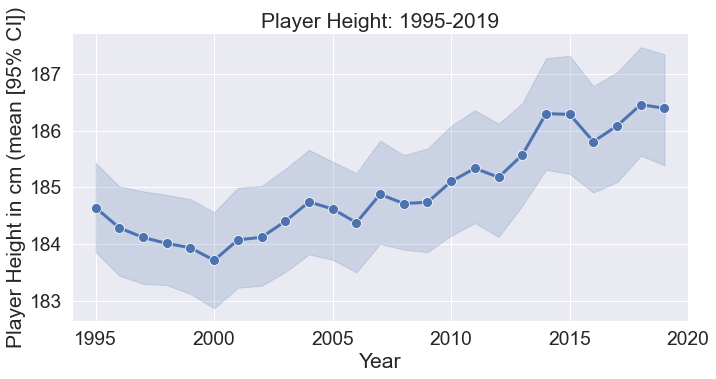

In [10]:
sns.set(font_scale=1.75)

p = sns.relplot(
    data=ht_by_yr_plyr, marker = "o", markersize=10, x="tour_yr", y="p_ht", height=5, aspect=2,
    kind="line", palette=['g'], linewidth=3
).set(title= "Player Height: 1995-2019", 
    ylabel="Player Height in cm (mean [95% CI])",
    xlabel= "Year", xlim = (1994, 2020), xticks = [1995, 2000, 2005, 2010, 2015, 2020]
)

#p._legend.set_title("Player Height")
#p._legend.set_bbox_to_anchor([1.08, .5])

Text(0, 0.5, 'Frequency')

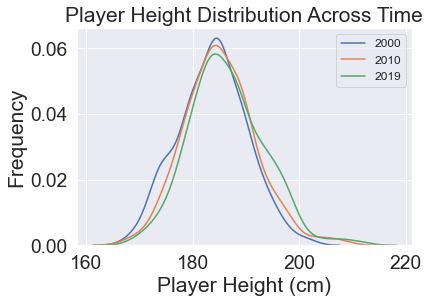

In [11]:
ht_2000 = ht_by_yr_plyr[ht_by_yr_plyr.tour_yr == 2000]
sns.distplot(ht_2000["p_ht"], kde=True, hist=False, label=2000)

ht_2010 = ht_by_yr_plyr[ht_by_yr_plyr.tour_yr == 2010]
sns.distplot(ht_2010["p_ht"], kde=True, hist=False, label=2010)

ht_2019 = ht_by_yr_plyr[ht_by_yr_plyr.tour_yr == 2019]
sns.distplot(ht_2019["p_ht"], kde=True, hist = False, label=2019)

plt.legend(prop={'size': 12})
plt.title('Player Height Distribution Across Time')
plt.xlabel('Player Height (cm)')
plt.ylabel('Frequency')

#### height by rank tier

In [12]:
ht_by_yr_plyr_rt = df.groupby(['tour_yr', 'rank_tier', 'p_id'], as_index=False)['p_ht'].mean()
ht_by_yr_plyr_rt

,tour_yr,rank_tier,p_id,p_ht
0,1995,126-200,100763,185.0
1,1995,126-200,100870,185.0
2,1995,126-200,100923,180.0
3,1995,126-200,100936,185.0
4,1995,126-200,100997,185.0
...,...,...,...,...
7898,2019,<=25,126610,196.0
7899,2019,<=25,126774,193.0
7900,2019,<=25,133430,185.0
7901,2019,<=25,200000,193.0


In [13]:
ht_by_yr_plyr_rt["rank_tier"].value_counts()

51-125     3018
126-200    2554
26-50      1393
<=25        938
Name: rank_tier, dtype: int64

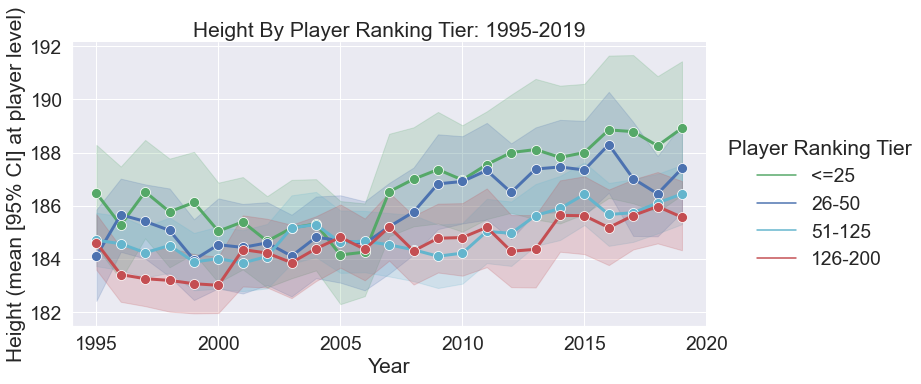

In [14]:
sns.set(font_scale=1.75)

p = sns.relplot(
    data=ht_by_yr_plyr_rt, marker = "o", markersize=10, x="tour_yr", y="p_ht", hue="rank_tier", hue_order=["<=25", "26-50", "51-125","126-200"], height=5, aspect=2, palette = ["g", "b", "c", "r"],
    kind="line", linewidth=3
).set(title="Height By Player Ranking Tier: 1995-2019", 
    ylabel="Height (mean [95% CI] at player level)",
    xlabel= "Year", xlim = (1994, 2020), xticks = [1995, 2000, 2005, 2010, 2015, 2020]
)

p._legend.set_title("Player Ranking Tier")
p._legend.set_bbox_to_anchor([1.08, .5])

### generate density plots for height vs rank tier, including change across time

In [15]:
# Filter down to years 2000, 2010, 2019

df_2000 = df[(df['tour_yr'] == 2000)]
ht_by_plyr_2000 = df_2000.groupby(['tour_yr','rank_tier','p_id'], as_index=False)['p_ht'].mean()

df_2010 = df[(df['tour_yr'] == 2010)]
ht_by_plyr_2010 = df_2010.groupby(['tour_yr','rank_tier','p_id'], as_index=False)['p_ht'].mean()

df_2019 = df[(df['tour_yr'] == 2019)]
ht_by_plyr_2019 = df_2019.groupby(['tour_yr','rank_tier','p_id'], as_index=False)['p_ht'].mean()

In [16]:
ht_by_plyr_2000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 333
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tour_yr    334 non-null    int64  
 1   rank_tier  334 non-null    object 
 2   p_id       334 non-null    int64  
 3   p_ht       334 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 13.0+ KB


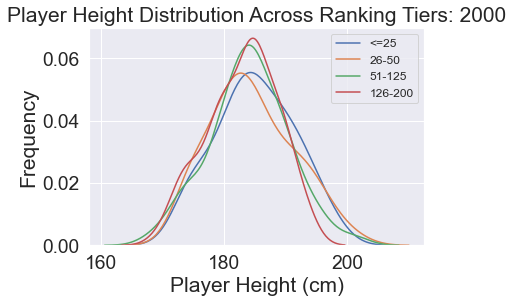

In [17]:
#Density plot across ranking tiers for 2000

Tier_1 = ht_by_plyr_2000[ht_by_plyr_2000.rank_tier == "<=25"]
sns.distplot(Tier_1["p_ht"], kde=True, hist=False, label="<=25")

Tier_2 = ht_by_plyr_2000[ht_by_plyr_2000.rank_tier == "26-50"]
sns.distplot(Tier_2["p_ht"], kde=True, hist=False, label="26-50")

Tier_3 = ht_by_plyr_2000[ht_by_plyr_2000.rank_tier == "51-125"]
sns.distplot(Tier_3["p_ht"], kde=True, hist=False, label="51-125")

Tier_4 = ht_by_plyr_2000[ht_by_plyr_2000.rank_tier == "126-200"]
sns.distplot(Tier_4["p_ht"], kde=True, hist=False, label="126-200")

plt.legend(prop={'size': 12})
plt.title('Player Height Distribution Across Ranking Tiers: 2000')
plt.xlabel('Player Height (cm)')
plt.ylabel('Frequency')
plt.xlim = (160, 220)
plt.ylim = (0,.08)
plt.xticklabels = [160, 170, 180, 190, 200, 210, 220]

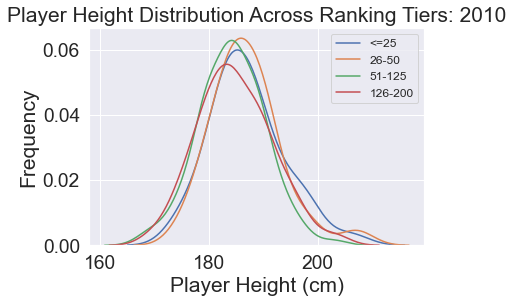

In [18]:
#Density plot across ranking tiers for 2010

Tier_1 = ht_by_plyr_2010[ht_by_plyr_2010.rank_tier == "<=25"]
sns.distplot(Tier_1["p_ht"], kde=True, hist=False, label="<=25")

Tier_2 = ht_by_plyr_2010[ht_by_plyr_2010.rank_tier == "26-50"]
sns.distplot(Tier_2["p_ht"], kde=True, hist=False, label="26-50")

Tier_3 = ht_by_plyr_2010[ht_by_plyr_2010.rank_tier == "51-125"]
sns.distplot(Tier_3["p_ht"], kde=True, hist=False, label="51-125")

Tier_4 = ht_by_plyr_2010[ht_by_plyr_2010.rank_tier == "126-200"]
sns.distplot(Tier_4["p_ht"], kde=True, hist=False, label="126-200")

plt.legend(prop={'size': 12})
plt.title('Player Height Distribution Across Ranking Tiers: 2010')
plt.xlabel('Player Height (cm)')
plt.ylabel('Frequency')
plt.xlim = (160, 220)
plt.ylim = (0,.08)
plt.xticklabels = [160, 170, 180, 190, 200, 210, 220]

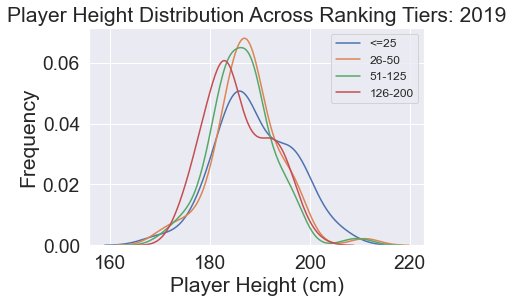

In [19]:
#Density plot across ranking tiers for 2019

Tier_1 = ht_by_plyr_2019[ht_by_plyr_2019.rank_tier == "<=25"]
sns.distplot(Tier_1["p_ht"], kde=True, hist=False, label="<=25")

Tier_2 = ht_by_plyr_2019[ht_by_plyr_2019.rank_tier == "26-50"]
sns.distplot(Tier_2["p_ht"], kde=True, hist=False, label="26-50")

Tier_3 = ht_by_plyr_2019[ht_by_plyr_2019.rank_tier == "51-125"]
sns.distplot(Tier_3["p_ht"], kde=True, hist=False, label="51-125")

Tier_4 = ht_by_plyr_2019[ht_by_plyr_2019.rank_tier == "126-200"]
sns.distplot(Tier_4["p_ht"], kde=True, hist=False, label="126-200")

plt.legend(prop={'size': 12})
plt.title('Player Height Distribution Across Ranking Tiers: 2019')
plt.xlabel('Player Height (cm)')
plt.ylabel('Frequency')
plt.xlim = (160, 220)
plt.ylim = (0,.08)
plt.xticks = [160, 170, 180, 190, 200, 210, 220]
plt.yticks = [0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]

### Age Trends Analysis

In [20]:
age_by_yr_plyr = df.groupby(['tour_yr','p_id'], as_index=False)['p_age'].mean()
age_by_yr_plyr

,tour_yr,p_id,p_age
0,1995,100757,33.823182
1,1995,100763,33.511667
2,1995,100837,32.880000
3,1995,100870,32.440000
4,1995,100923,31.865556
...,...,...,...
5097,2019,200221,20.070000
5098,2019,200282,20.371569
5099,2019,200484,18.616000
5100,2019,200615,19.830741


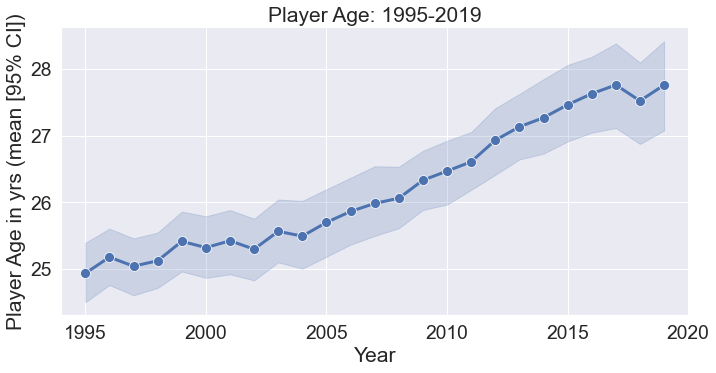

In [21]:
sns.set(font_scale=1.75)

p = sns.relplot(
    data=age_by_yr_plyr, marker = "o", markersize=10, x="tour_yr", y="p_age", height=5, aspect=2,
    kind="line", palette=['g'], linewidth=3
).set(title= "Player Age: 1995-2019", 
    ylabel="Player Age in yrs (mean [95% CI])",
    xlabel= "Year", xlim = (1994, 2020), xticks = [1995, 2000, 2005, 2010, 2015, 2020]
)

Text(0, 0.5, 'Frequency')

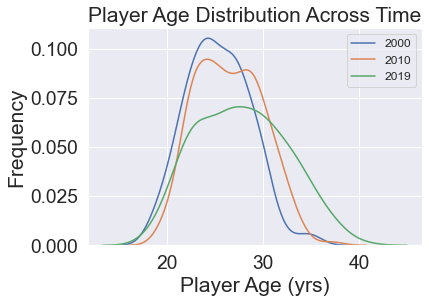

In [22]:
age_2000 = age_by_yr_plyr[age_by_yr_plyr.tour_yr == 2000]
sns.distplot(age_2000["p_age"], kde=True, hist=False, label=2000)

age_2010 = age_by_yr_plyr[age_by_yr_plyr.tour_yr == 2010]
sns.distplot(age_2010["p_age"], kde=True, hist=False, label=2010)

age_2019 = age_by_yr_plyr[age_by_yr_plyr.tour_yr == 2019]
sns.distplot(age_2019["p_age"], kde=True, hist = False, label=2019)

plt.legend(prop={'size': 12})
plt.title('Player Age Distribution Across Time')
plt.xlabel('Player Age (yrs)')
plt.ylabel('Frequency')

#### age by rank tier

In [23]:
age_by_yr_plyr_rt = df.groupby(['tour_yr', 'rank_tier', 'p_id'], as_index=False)['p_age'].mean()
age_by_yr_plyr_rt

,tour_yr,rank_tier,p_id,p_age
0,1995,126-200,100763,33.535000
1,1995,126-200,100870,32.440000
2,1995,126-200,100923,31.844286
3,1995,126-200,100936,32.195000
4,1995,126-200,100997,31.160000
...,...,...,...,...
7898,2019,<=25,126610,23.470909
7899,2019,<=25,126774,20.813973
7900,2019,<=25,133430,19.944545
7901,2019,<=25,200000,19.057500


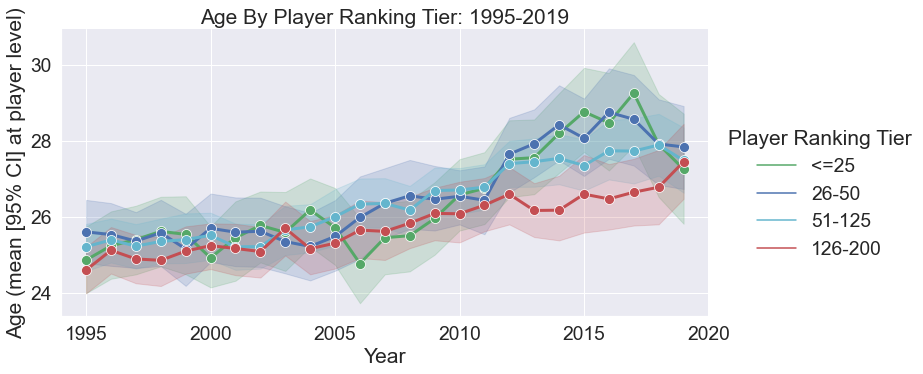

In [24]:
sns.set(font_scale=1.75)

p = sns.relplot(
    data=age_by_yr_plyr_rt, marker = "o", markersize=10, x="tour_yr", y="p_age", hue="rank_tier", hue_order=["<=25", "26-50", "51-125","126-200"], height=5, aspect=2, palette = ["g", "b", "c", "r"],
    kind="line", linewidth=3
).set(title="Age By Player Ranking Tier: 1995-2019", 
    ylabel="Age (mean [95% CI] at player level)",
    xlabel= "Year", xlim = (1994, 2020), xticks = [1995, 2000, 2005, 2010, 2015, 2020]
)

p._legend.set_title("Player Ranking Tier")
p._legend.set_bbox_to_anchor([1.08, .5])

## Serve Performance

In [25]:
sv_perc_win_by_yr_plyr = df.groupby(['tour_yr','p_id'], as_index=False)['p_sv_pts_won%'].mean()
sv_perc_win_by_yr_plyr

,tour_yr,p_id,p_sv_pts_won%
0,1995,100757,62.884545
1,1995,100763,56.000000
2,1995,100837,58.235714
3,1995,100870,53.190000
4,1995,100923,61.492222
...,...,...,...
5097,2019,200221,58.213333
5098,2019,200282,67.312549
5099,2019,200484,62.068000
5100,2019,200615,62.601852


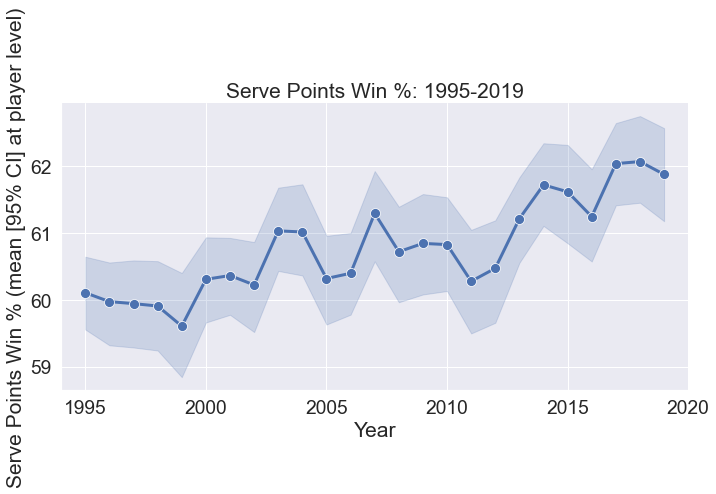

In [26]:
sns.set(font_scale=1.75)

p = sns.relplot(
    data=sv_perc_win_by_yr_plyr, marker = "o", markersize=10, x="tour_yr", y="p_sv_pts_won%", 
    height=5, aspect=2, 
    kind="line",
    palette=['g'], linewidth=3
).set(title="Serve Points Win %: 1995-2019", 
    ylabel="Serve Points Win % (mean [95% CI] at player level)",
    xlabel= "Year", xlim = (1994, 2020), xticks = [1995, 2000, 2005, 2010, 2015, 2020]
)

#p._legend.set_title("Play Surface")
#p._legend.set_bbox_to_anchor([1.08, .5])

In [27]:
sv_perc_win_by_yr_surf_plyr = df.groupby(['tour_yr','t_surf','p_id'], as_index=False)['p_sv_pts_won%'].mean()
sv_perc_win_by_yr_surf_plyr 

,tour_yr,t_surf,p_id,p_sv_pts_won%
0,1995,Clay,100757,59.130000
1,1995,Clay,100837,52.515000
2,1995,Clay,100936,55.368889
3,1995,Clay,101016,56.650000
4,1995,Clay,101026,54.330000
...,...,...,...,...
8834,2019,Hard,200175,66.303871
8835,2019,Hard,200221,57.080000
8836,2019,Hard,200282,68.259130
8837,2019,Hard,200615,63.002609


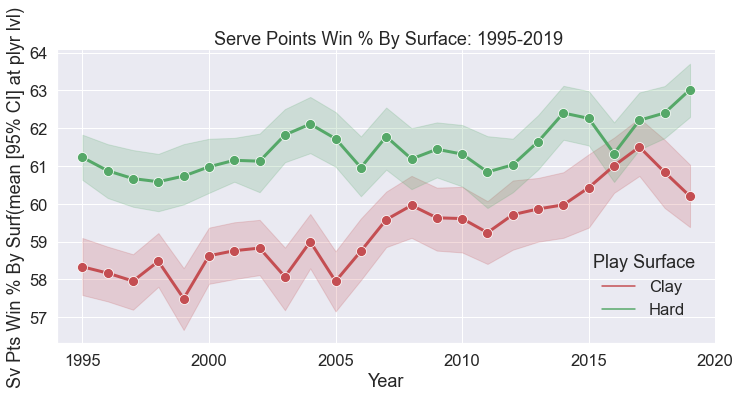

In [28]:
sns.set(font_scale=1.5)

p = sns.relplot(
    data=sv_perc_win_by_yr_surf_plyr, marker = "o", markersize=10, x="tour_yr", y="p_sv_pts_won%", hue="t_surf", hue_order=["Clay","Hard"], 
    height=5, aspect=2, 
    kind="line",
    palette=['r', 'g'], linewidth=3
).set(title=" Serve Points Win % By Surface: 1995-2019", 
    ylabel="Sv Pts Win % By Surf(mean [95% CI] at plyr lvl)",
    xlabel= "Year", xlim = (1994, 2020), xticks = [1995, 2000, 2005, 2010, 2015, 2020]
)

p._legend.set_title("Play Surface")
p._legend.set_bbox_to_anchor([.87, .31])

### serve performance by ranking tier

In [29]:
sv_perc_win_by_yr_plyr_rt = df.groupby(['tour_yr', 'rank_tier', 'p_id'], as_index=False)['p_sv_pts_won%'].mean()
sv_perc_win_by_yr_plyr_rt

,tour_yr,rank_tier,p_id,p_sv_pts_won%
0,1995,126-200,100763,53.287500
1,1995,126-200,100870,53.190000
2,1995,126-200,100923,62.324286
3,1995,126-200,100936,59.028333
4,1995,126-200,100997,56.920000
...,...,...,...,...
7898,2019,<=25,126610,68.040000
7899,2019,<=25,126774,68.518630
7900,2019,<=25,133430,65.540455
7901,2019,<=25,200000,64.845000


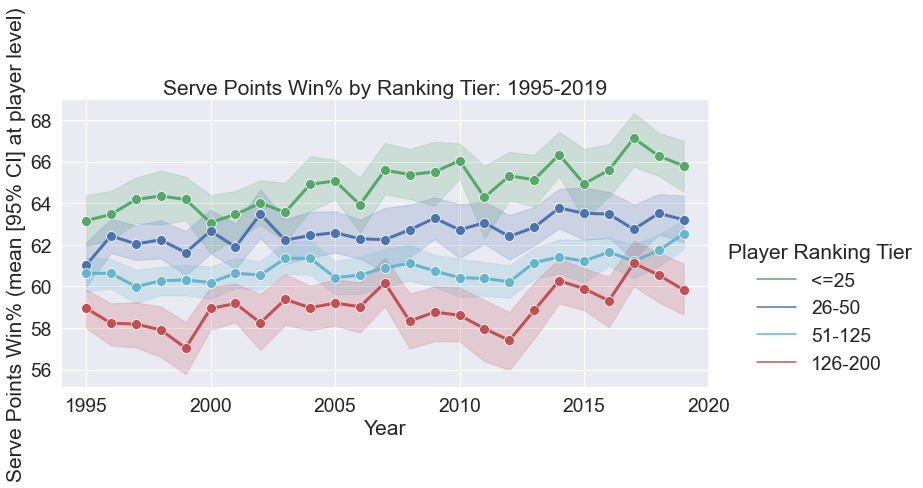

In [30]:
sns.set(font_scale=1.75)

p = sns.relplot(
    data=sv_perc_win_by_yr_plyr_rt, marker = "o", markersize=10, x="tour_yr", y="p_sv_pts_won%", hue="rank_tier", hue_order=["<=25", "26-50", "51-125","126-200"], height=5, aspect=2, palette = ["g", "b", "c", "r"],
    kind="line", linewidth=3
).set(title="Serve Points Win% by Ranking Tier: 1995-2019", 
    ylabel="Serve Points Win% (mean [95% CI] at player level)",
    xlabel= "Year", xlim = (1994, 2020), xticks = [1995, 2000, 2005, 2010, 2015, 2020]
)

p._legend.set_title("Player Ranking Tier")
p._legend.set_bbox_to_anchor([1.08, .5])

### Serve Performance Over Time By Ranking Tier - Hard Court Only

In [31]:
hc_data = df[(df['t_surf'] == "Hard")]
sv_by_rank_hc = hc_data.groupby(['tour_yr', 'rank_tier', 'p_id'], as_index=False)['p_sv_pts_won%'].mean()
sv_by_rank_hc

,tour_yr,rank_tier,p_id,p_sv_pts_won%
0,1995,126-200,100763,53.287500
1,1995,126-200,100870,53.190000
2,1995,126-200,100923,62.324286
3,1995,126-200,100936,61.456667
4,1995,126-200,100997,56.920000
...,...,...,...,...
6870,2019,<=25,126610,68.040000
6871,2019,<=25,126774,69.795849
6872,2019,<=25,133430,69.203571
6873,2019,<=25,200000,64.845000


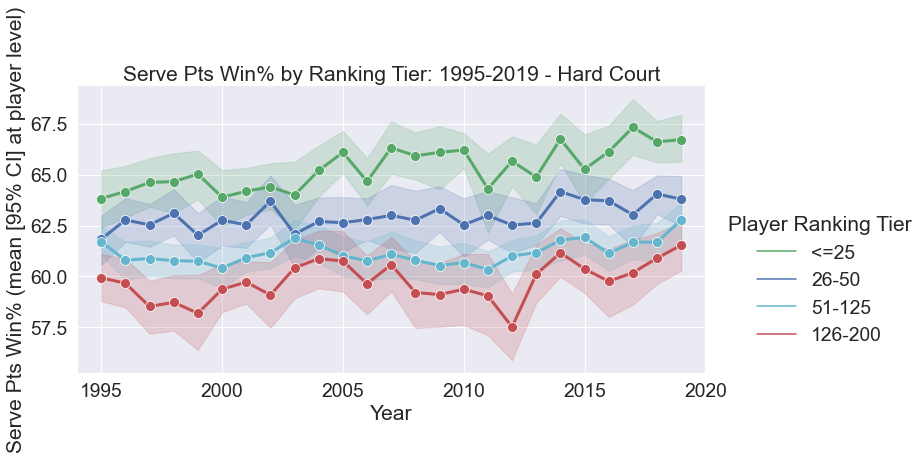

In [32]:
sns.set(font_scale=1.75)

p = sns.relplot(
    data=sv_by_rank_hc, marker = "o", markersize=10, x="tour_yr", y="p_sv_pts_won%", hue="rank_tier", hue_order=["<=25", "26-50", "51-125","126-200"], height=5, aspect=2, palette = ["g", "b", "c", "r"],
    kind="line", linewidth=3
).set(title="Serve Pts Win% by Ranking Tier: 1995-2019 - Hard Court", 
    ylabel="Serve Pts Win% (mean [95% CI] at player level)",
    xlabel= "Year", xlim = (1994, 2020), xticks = [1995, 2000, 2005, 2010, 2015, 2020]
)

p._legend.set_title("Player Ranking Tier")
p._legend.set_bbox_to_anchor([1.08, .5])

### Serve Performance Over Time By Ranking Tier - Hard Court Only

In [33]:
cc_data = df[(df['t_surf'] == "Clay")]
sv_by_rank_cc = cc_data.groupby(['tour_yr', 'rank_tier', 'p_id'], as_index=False)['p_sv_pts_won%'].mean()
sv_by_rank_cc

,tour_yr,rank_tier,p_id,p_sv_pts_won%
0,1995,126-200,100936,56.600000
1,1995,126-200,101016,56.650000
2,1995,126-200,101086,56.647500
3,1995,126-200,101124,43.180000
4,1995,126-200,101133,59.430000
...,...,...,...,...
5420,2019,<=25,106432,66.750000
5421,2019,<=25,111575,62.592308
5422,2019,<=25,126774,65.134000
5423,2019,<=25,133430,59.130000


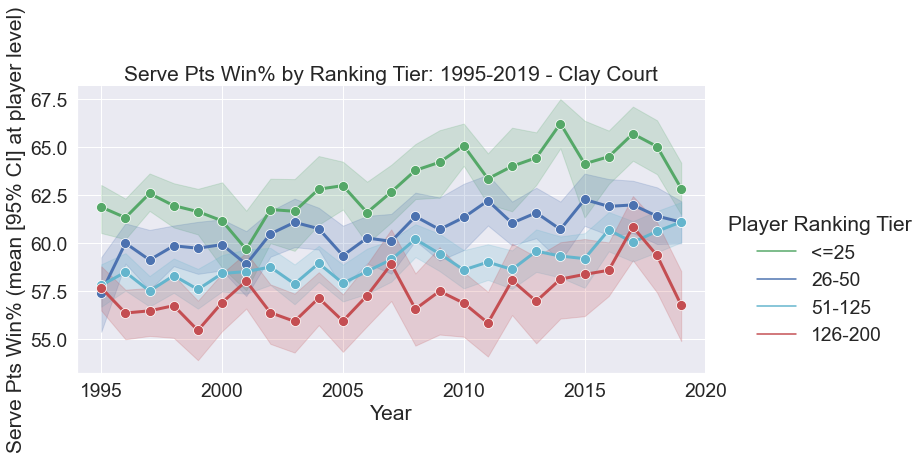

In [34]:
sns.set(font_scale=1.75)

p = sns.relplot(
    data=sv_by_rank_cc, marker = "o", markersize=10, x="tour_yr", y="p_sv_pts_won%", hue="rank_tier", hue_order=["<=25", "26-50", "51-125","126-200"], height=5, aspect=2, palette = ["g", "b", "c", "r"],
    kind="line", linewidth=3
).set(title="Serve Pts Win% by Ranking Tier: 1995-2019 - Clay Court", 
    ylabel="Serve Pts Win% (mean [95% CI] at player level)",
    xlabel= "Year", xlim = (1994, 2020), xticks = [1995, 2000, 2005, 2010, 2015, 2020]
)

p._legend.set_title("Player Ranking Tier")
p._legend.set_bbox_to_anchor([1.08, .5])

### Relationship between height and serve performance

In [35]:
sv_perc_win_by_yr_plyr_rt = df.groupby(['tour_yr', 'p_id', 'p_ht'], as_index=False)['p_sv_pts_won%'].mean()
sv_perc_win_by_yr_plyr_rt

,tour_yr,p_id,p_ht,p_sv_pts_won%
0,1995,100757,180.0,62.884545
1,1995,100763,185.0,56.000000
2,1995,100837,180.0,58.235714
3,1995,100870,185.0,53.190000
4,1995,100923,180.0,61.492222
...,...,...,...,...
5097,2019,200221,183.0,58.213333
5098,2019,200282,183.0,67.312549
5099,2019,200484,185.0,62.068000
5100,2019,200615,196.0,62.601852


In [36]:
#save for analysis stage
#sv_perc_win_by_yr_plyr_rt.to_csv('../data/sv_perc_win_by_yr_plyr_rt.csv', index=False)

Text(0.5, 1.0, 'Player Height vs Serve Points Win%')

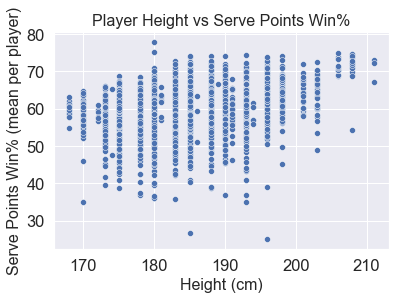

In [37]:
sns.set(font_scale=1.5)

p = sns.scatterplot(x="p_ht",
                    y="p_sv_pts_won%",
                    data=sv_perc_win_by_yr_plyr_rt, legend=None)

plt.xlabel("Height (cm)", size = 16)
plt.ylabel("Serve Points Win% (mean per player)", size = 16)
plt.title("Player Height vs Serve Points Win%", size = 16)
#p.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, title="Player Ranking Tier")

#hue="rank_tier", hue_order=["<=25", "26-50", "51-125","126-200"]

#### same as above, but hard court only

In [38]:
sv_perc_win_by_yr_plyr_rt_surf = df.groupby(['tour_yr','t_surf', 'p_id', 'p_ht'], as_index=False)['p_sv_pts_won%'].mean()
sv_perc_win_by_yr_plyr_rt_surf

,tour_yr,t_surf,p_id,p_ht,p_sv_pts_won%
0,1995,Clay,100757,180.0,59.130000
1,1995,Clay,100837,180.0,52.515000
2,1995,Clay,100936,185.0,55.368889
3,1995,Clay,101016,185.0,56.650000
4,1995,Clay,101026,193.0,54.330000
...,...,...,...,...,...
8834,2019,Hard,200175,183.0,66.303871
8835,2019,Hard,200221,183.0,57.080000
8836,2019,Hard,200282,183.0,68.259130
8837,2019,Hard,200615,196.0,63.002609


In [39]:
#sv_perc_win_by_yr_plyr_rt_surf.to_csv('../data/sv_perc_win_by_yr_plyr_rt_surf.csv', index=False)

In [40]:
#Hard Court Only
df_hc_filter = sv_perc_win_by_yr_plyr_rt_surf.loc[(sv_perc_win_by_yr_plyr_rt_surf["t_surf"] == "Hard")]
df_hc_filter

,tour_yr,t_surf,p_id,p_ht,p_sv_pts_won%
183,1995,Hard,100757,180.0,63.260000
184,1995,Hard,100763,185.0,56.000000
185,1995,Hard,100837,180.0,58.675769
186,1995,Hard,100870,185.0,53.190000
187,1995,Hard,100923,180.0,61.492222
...,...,...,...,...,...
8834,2019,Hard,200175,183.0,66.303871
8835,2019,Hard,200221,183.0,57.080000
8836,2019,Hard,200282,183.0,68.259130
8837,2019,Hard,200615,196.0,63.002609


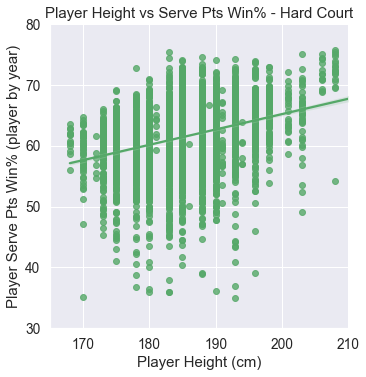

In [41]:
#Plot for hard court only

sns.set(font_scale=1.25)

p = sns.lmplot(x="p_ht", y="p_sv_pts_won%", data=df_hc_filter, hue="t_surf", palette=["g"], legend=None)

p.set(xlim=(165, 210))
p.set(ylim=(30, 80))
p.set(xlabel = "Player Height (cm)")
p.set(ylabel = "Player Serve Pts Win% (player by year)")
p.set(title = "Player Height vs Serve Pts Win% - Hard Court")

In [42]:
#Clay Court Only
df_cc_filter = sv_perc_win_by_yr_plyr_rt_surf.loc[(sv_perc_win_by_yr_plyr_rt_surf["t_surf"] == "Clay")]
df_cc_filter

,tour_yr,t_surf,p_id,p_ht,p_sv_pts_won%
0,1995,Clay,100757,180.0,59.130000
1,1995,Clay,100837,180.0,52.515000
2,1995,Clay,100936,185.0,55.368889
3,1995,Clay,101016,185.0,56.650000
4,1995,Clay,101026,193.0,54.330000
...,...,...,...,...,...
8650,2019,Clay,200175,183.0,53.323333
8651,2019,Clay,200221,183.0,58.591111
8652,2019,Clay,200282,183.0,58.604000
8653,2019,Clay,200484,185.0,62.068000


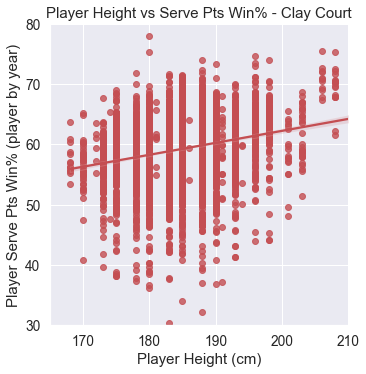

In [43]:
#Plot for clay court only

sns.set(font_scale=1.25)

p = sns.lmplot(x="p_ht", y="p_sv_pts_won%", data=df_cc_filter, hue="t_surf", palette=["r"], legend=None)

p.set(xlim=(165, 210))
p.set(ylim=(30, 80))
p.set(xlabel = "Player Height (cm)")
p.set(ylabel = "Player Serve Pts Win% (player by year)")
p.set(title = "Player Height vs Serve Pts Win% - Clay Court")

### Height and Serve Performance Relationship By Ranking Tier (Restricted to Hard Court)

In [44]:
#Hard Court Only
df_filter_hard = df.loc[(df["t_surf"] == "Hard")]
df_filter_hard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74175 entries, 3 to 117344
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   t_id            74175 non-null  object 
 1   t_surf          74175 non-null  object 
 2   tour_yr         74175 non-null  int64  
 3   p_id            74175 non-null  int64  
 4   p_name          74175 non-null  object 
 5   p_ht            74175 non-null  float64
 6   p_age           74175 non-null  float64
 7   p_rank          74175 non-null  float64
 8   p_pts_won%      74175 non-null  float64
 9   p_sv_pts_won%   74174 non-null  float64
 10  p_ret_pts_won%  74173 non-null  float64
 11  p_ace%          74174 non-null  float64
 12  p_aced%         74173 non-null  float64
 13  p_bp_save%      74175 non-null  float64
 14  p_bp_convert%   74175 non-null  float64
 15  rank_tier       74175 non-null  object 
 16  round_age       74175 non-null  float64
dtypes: float64(11), int64(2), obje

In [45]:
# Top Tier Only
df_filter_hard_toptier = df_filter_hard.loc[(df_filter_hard["rank_tier"] == "<=25")]
df_filter_hard_toptier

,t_id,t_surf,tour_yr,p_id,p_name,p_ht,p_age,p_rank,p_pts_won%,p_sv_pts_won%,p_ret_pts_won%,p_ace%,p_aced%,p_bp_save%,p_bp_convert%,rank_tier,round_age
261,2019-7696,Hard,2019,200282,Alex De Minaur,183.0,20.71,18.0,62.79,80.00,50.98,8.57,3.92,100.00,41.67,<=25,21.0
263,2019-0352,Hard,2019,200282,Alex De Minaur,183.0,20.69,18.0,58.16,65.31,51.02,6.12,8.16,0.00,83.33,<=25,21.0
265,2019-7696,Hard,2019,200282,Alex De Minaur,183.0,20.71,18.0,51.75,65.45,38.98,14.55,10.17,50.00,100.00,<=25,21.0
271,2019-7696,Hard,2019,200282,Alex De Minaur,183.0,20.71,18.0,57.85,71.43,48.61,10.20,2.78,50.00,29.41,<=25,21.0
272,2019-7696,Hard,2019,200282,Alex De Minaur,183.0,20.71,18.0,57.14,70.77,44.12,4.62,1.47,66.67,83.33,<=25,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117295,2016-0429,Hard,2016,100644,Alexander Zverev,198.0,19.49,20.0,53.12,70.97,36.36,11.29,1.52,50.00,37.50,<=25,19.0
117302,2016-M015,Hard,2016,100644,Alexander Zverev,198.0,19.46,24.0,43.01,46.88,39.18,4.17,3.09,33.33,30.77,<=25,19.0
117303,2016-0421,Hard,2016,100644,Alexander Zverev,198.0,19.26,25.0,44.93,56.72,33.80,4.48,4.23,57.14,16.67,<=25,19.0
117316,2016-5014,Hard,2016,100644,Alexander Zverev,198.0,19.47,21.0,49.30,61.82,35.92,7.27,10.68,50.00,33.33,<=25,19.0


In [46]:
pts_df_filter_hard_toptier = df_filter_hard_toptier.groupby(['tour_yr','rank_tier','p_id', 'p_ht'], as_index=False)['p_sv_pts_won%'].mean()
pts_df_filter_hard_toptier

,tour_yr,rank_tier,p_id,p_ht,p_sv_pts_won%
0,1995,<=25,101185,188.0,58.970000
1,1995,<=25,101222,188.0,65.693000
2,1995,<=25,101235,188.0,60.804375
3,1995,<=25,101334,188.0,56.300000
4,1995,<=25,101381,183.0,63.127500
...,...,...,...,...,...
911,2019,<=25,126610,196.0,68.040000
912,2019,<=25,126774,193.0,69.795849
913,2019,<=25,133430,185.0,69.203571
914,2019,<=25,200000,193.0,64.845000


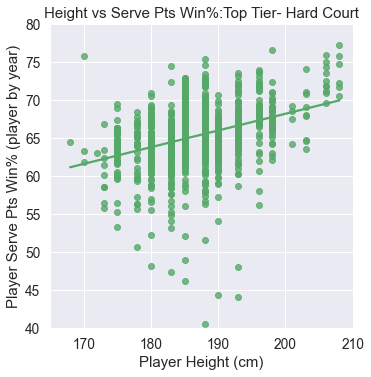

In [47]:
#Plot for Tier 1 (hard court only)

sns.set(font_scale=1.25)

p = sns.lmplot(x="p_ht", y="p_sv_pts_won%", data=pts_df_filter_hard_toptier, hue="rank_tier", palette=["g"], legend=None, ci=None)

p.set(xlim=(165, 210))
p.set(ylim=(40, 80))
p.set(xlabel = "Player Height (cm)")
p.set(ylabel = "Player Serve Pts Win% (player by year)")
p.set(title = "Height vs Serve Pts Win%:Top Tier- Hard Court")

In [48]:
# Second Tier Only
df_filter_hard_secondtier = df_filter_hard.loc[(df_filter_hard["rank_tier"] == "26-50")]
df_filter_hard_secondtier

pts_df_filter_hard_secondtier = df_filter_hard_secondtier.groupby(['tour_yr','rank_tier','p_id', 'p_ht'], as_index=False)['p_sv_pts_won%'].mean()
pts_df_filter_hard_secondtier

,tour_yr,rank_tier,p_id,p_ht,p_sv_pts_won%
0,1995,26-50,101062,183.0,53.917500
1,1995,26-50,101084,188.0,60.280000
2,1995,26-50,101098,190.0,67.474118
3,1995,26-50,101120,190.0,63.083333
4,1995,26-50,101185,188.0,62.837500
...,...,...,...,...,...
1310,2019,26-50,132283,191.0,63.782000
1311,2019,26-50,133430,185.0,68.805312
1312,2019,26-50,200005,188.0,50.000000
1313,2019,26-50,200175,183.0,62.372500


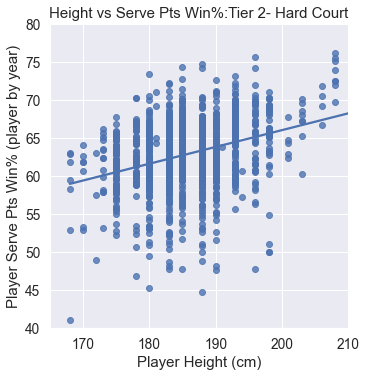

In [49]:
#Plot for Tier 2 (hard court only)

sns.set(font_scale=1.25)

p = sns.lmplot(x="p_ht", y="p_sv_pts_won%", data=pts_df_filter_hard_secondtier, hue="rank_tier", palette=["b"], legend=None, ci=None)

p.set(xlim=(165, 210))
p.set(ylim=(40, 80))
p.set(xlabel = "Player Height (cm)")
p.set(ylabel = "Player Serve Pts Win% (player by year)")
p.set(title = "Height vs Serve Pts Win%:Tier 2- Hard Court")

In [50]:
# Third Tier Only
df_filter_hard_thirdtier = df_filter_hard.loc[(df_filter_hard["rank_tier"] == "51-125")]
df_filter_hard_thirdtier

pts_df_filter_hard_thirdtier = df_filter_hard_thirdtier.groupby(['tour_yr','rank_tier','p_id', 'p_ht'], as_index=False)['p_sv_pts_won%'].mean()
pts_df_filter_hard_thirdtier

,tour_yr,rank_tier,p_id,p_ht,p_sv_pts_won%
0,1995,51-125,100757,180.0,63.260000
1,1995,51-125,100763,185.0,61.425000
2,1995,51-125,100837,180.0,58.675769
3,1995,51-125,100923,180.0,58.580000
4,1995,51-125,100936,185.0,58.318333
...,...,...,...,...,...
2819,2019,51-125,200005,188.0,66.465217
2820,2019,51-125,200175,183.0,66.804444
2821,2019,51-125,200221,183.0,57.080000
2822,2019,51-125,200615,196.0,63.899333


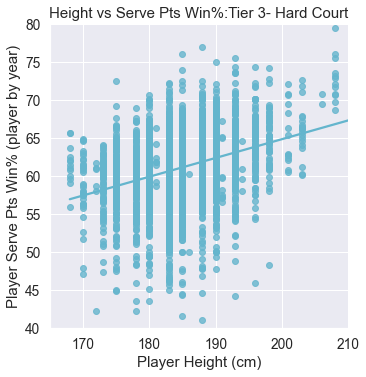

In [51]:
#Plot for Tier 3 (hard court only)

sns.set(font_scale=1.25)

p = sns.lmplot(x="p_ht", y="p_sv_pts_won%", data=pts_df_filter_hard_thirdtier, hue="rank_tier", palette=["c"], legend=None, ci=None)

p.set(xlim=(165, 210))
p.set(ylim=(40, 80))
p.set(xlabel = "Player Height (cm)")
p.set(ylabel = "Player Serve Pts Win% (player by year)")
p.set(title = "Height vs Serve Pts Win%:Tier 3- Hard Court")

In [52]:
# Fourth Tier Only
df_filter_hard_fourthtier = df_filter_hard.loc[(df_filter_hard["rank_tier"] == "126-200")]
df_filter_hard_fourthtier

pts_df_filter_hard_fourthtier = df_filter_hard_fourthtier.groupby(['tour_yr','rank_tier','p_id', 'p_ht'], as_index=False)['p_sv_pts_won%'].mean()
pts_df_filter_hard_fourthtier

,tour_yr,rank_tier,p_id,p_ht,p_sv_pts_won%
0,1995,126-200,100763,185.0,53.287500
1,1995,126-200,100870,185.0,53.190000
2,1995,126-200,100923,180.0,62.324286
3,1995,126-200,100936,185.0,61.456667
4,1995,126-200,100997,185.0,56.920000
...,...,...,...,...,...
1815,2019,126-200,144707,183.0,60.670000
1816,2019,126-200,144895,178.0,62.500000
1817,2019,126-200,200175,183.0,70.792000
1818,2019,126-200,200615,196.0,61.321250


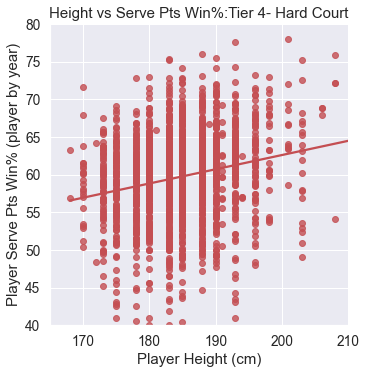

In [53]:
#Plot for Tier 4 (hard court only)

sns.set(font_scale=1.25)

p = sns.lmplot(x="p_ht", y="p_sv_pts_won%", data=pts_df_filter_hard_fourthtier, hue="rank_tier", palette=["r"], legend=None, ci=None)

p.set(xlim=(165, 210))
p.set(ylim=(40, 80))
p.set(xlabel = "Player Height (cm)")
p.set(ylabel = "Player Serve Pts Win% (player by year)")
p.set(title = "Height vs Serve Pts Win%:Tier 4- Hard Court")

### Height and Serve Performance: Restricted to the Last Decade (and still just hard courts)

In [54]:
#Hard Court and since 2010 Only
df_filter_hard = df.loc[(df["t_surf"] == "Hard")]
df_filter_hard_2010to2019 = df_filter_hard.loc[(df_filter_hard["tour_yr"] >= 2010)]
df_filter_hard_2010to2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28229 entries, 212 to 117344
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   t_id            28229 non-null  object 
 1   t_surf          28229 non-null  object 
 2   tour_yr         28229 non-null  int64  
 3   p_id            28229 non-null  int64  
 4   p_name          28229 non-null  object 
 5   p_ht            28229 non-null  float64
 6   p_age           28229 non-null  float64
 7   p_rank          28229 non-null  float64
 8   p_pts_won%      28229 non-null  float64
 9   p_sv_pts_won%   28229 non-null  float64
 10  p_ret_pts_won%  28229 non-null  float64
 11  p_ace%          28229 non-null  float64
 12  p_aced%         28229 non-null  float64
 13  p_bp_save%      28229 non-null  float64
 14  p_bp_convert%   28229 non-null  float64
 15  rank_tier       28229 non-null  object 
 16  round_age       28229 non-null  float64
dtypes: float64(11), int64(2), ob

In [55]:
# Top Tier Only
df_filter_hard_toptier_2010to2019 = df_filter_hard_2010to2019.loc[(df_filter_hard_2010to2019["rank_tier"] == "<=25")]
df_filter_hard_toptier_2010to2019

,t_id,t_surf,tour_yr,p_id,p_name,p_ht,p_age,p_rank,p_pts_won%,p_sv_pts_won%,p_ret_pts_won%,p_ace%,p_aced%,p_bp_save%,p_bp_convert%,rank_tier,round_age
261,2019-7696,Hard,2019,200282,Alex De Minaur,183.0,20.71,18.0,62.79,80.00,50.98,8.57,3.92,100.00,41.67,<=25,21.0
263,2019-0352,Hard,2019,200282,Alex De Minaur,183.0,20.69,18.0,58.16,65.31,51.02,6.12,8.16,0.00,83.33,<=25,21.0
265,2019-7696,Hard,2019,200282,Alex De Minaur,183.0,20.71,18.0,51.75,65.45,38.98,14.55,10.17,50.00,100.00,<=25,21.0
271,2019-7696,Hard,2019,200282,Alex De Minaur,183.0,20.71,18.0,57.85,71.43,48.61,10.20,2.78,50.00,29.41,<=25,21.0
272,2019-7696,Hard,2019,200282,Alex De Minaur,183.0,20.71,18.0,57.14,70.77,44.12,4.62,1.47,66.67,83.33,<=25,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117295,2016-0429,Hard,2016,100644,Alexander Zverev,198.0,19.49,20.0,53.12,70.97,36.36,11.29,1.52,50.00,37.50,<=25,19.0
117302,2016-M015,Hard,2016,100644,Alexander Zverev,198.0,19.46,24.0,43.01,46.88,39.18,4.17,3.09,33.33,30.77,<=25,19.0
117303,2016-0421,Hard,2016,100644,Alexander Zverev,198.0,19.26,25.0,44.93,56.72,33.80,4.48,4.23,57.14,16.67,<=25,19.0
117316,2016-5014,Hard,2016,100644,Alexander Zverev,198.0,19.47,21.0,49.30,61.82,35.92,7.27,10.68,50.00,33.33,<=25,19.0


In [56]:
pts_df_filter_hard_toptier_2010to2019 = df_filter_hard_toptier_2010to2019.groupby(['tour_yr','rank_tier','p_id', 'p_ht'], as_index=False)['p_sv_pts_won%'].mean()
pts_df_filter_hard_toptier_2010to2019

,tour_yr,rank_tier,p_id,p_ht,p_sv_pts_won%
0,2010,<=25,103163,188.0,63.400000
1,2010,<=25,103285,185.0,66.131000
2,2010,<=25,103344,193.0,66.586522
3,2010,<=25,103507,183.0,63.066250
4,2010,<=25,103602,183.0,67.188571
...,...,...,...,...,...
343,2019,<=25,126610,196.0,68.040000
344,2019,<=25,126774,193.0,69.795849
345,2019,<=25,133430,185.0,69.203571
346,2019,<=25,200000,193.0,64.845000


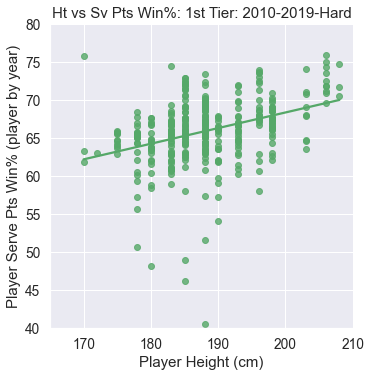

In [57]:
#Plot for Tier 1 (2010-2019; hard court only)

sns.set(font_scale=1.25)

p = sns.lmplot(x="p_ht", y="p_sv_pts_won%", data=pts_df_filter_hard_toptier_2010to2019, hue="rank_tier", palette=["g"], legend=None, ci=None)

p.set(xlim=(165, 210))
p.set(ylim=(40, 80))
p.set(xlabel = "Player Height (cm)")
p.set(ylabel = "Player Serve Pts Win% (player by year)")
p.set(title = "Ht vs Sv Pts Win%: 1st Tier: 2010-2019-Hard")

In [58]:
# Second Tier Only
df_filter_hard_secondtier_2010to2019 = df_filter_hard_2010to2019.loc[(df_filter_hard_2010to2019["rank_tier"] == "26-50")]
df_filter_hard_secondtier_2010to2019

,t_id,t_surf,tour_yr,p_id,p_name,p_ht,p_age,p_rank,p_pts_won%,p_sv_pts_won%,p_ret_pts_won%,p_ace%,p_aced%,p_bp_save%,p_bp_convert%,rank_tier,round_age
260,2019-M020,Hard,2019,200282,Alex De Minaur,183.0,19.87,31.0,63.04,72.09,55.10,2.33,10.20,75.00,55.56,26-50,20.0
262,2019-6116,Hard,2019,200282,Alex De Minaur,183.0,20.42,34.0,57.58,85.11,32.69,8.51,7.69,100.00,100.00,26-50,20.0
264,2019-9164,Hard,2019,200282,Alex De Minaur,183.0,20.60,31.0,61.05,63.04,59.18,2.17,2.04,33.33,85.71,26-50,21.0
266,2019-0328,Hard,2019,200282,Alex De Minaur,183.0,20.67,28.0,56.73,69.39,45.45,6.12,10.91,0.00,40.00,26-50,21.0
267,2019-6116,Hard,2019,200282,Alex De Minaur,183.0,20.42,34.0,56.41,81.48,34.92,14.81,14.29,100.00,50.00,26-50,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117298,2016-M035,Hard,2016,100644,Alexander Zverev,198.0,19.24,27.0,56.45,69.84,42.62,11.11,4.92,100.00,42.86,26-50,19.0
117299,2016-M035,Hard,2016,100644,Alexander Zverev,198.0,19.24,27.0,63.27,75.00,53.70,11.36,3.70,100.00,66.67,26-50,19.0
117304,2016-M024,Hard,2016,100644,Alexander Zverev,198.0,19.32,27.0,47.31,61.29,33.33,4.30,3.23,58.33,33.33,26-50,19.0
117318,2016-560,Hard,2016,100644,Alexander Zverev,198.0,19.36,28.0,47.06,58.57,34.85,4.29,0.76,57.14,21.43,26-50,19.0


In [59]:
pts_df_filter_hard_secondtier_2010to2019 = df_filter_hard_secondtier_2010to2019.groupby(['tour_yr','rank_tier','p_id', 'p_ht'], as_index=False)['p_sv_pts_won%'].mean()
pts_df_filter_hard_secondtier_2010to2019

,tour_yr,rank_tier,p_id,p_ht,p_sv_pts_won%
0,2010,26-50,103285,185.0,62.986190
1,2010,26-50,103333,208.0,72.551500
2,2010,26-50,103344,193.0,68.488889
3,2010,26-50,103428,190.0,61.436000
4,2010,26-50,103484,185.0,67.290000
...,...,...,...,...,...
515,2019,26-50,132283,191.0,63.782000
516,2019,26-50,133430,185.0,68.805312
517,2019,26-50,200005,188.0,50.000000
518,2019,26-50,200175,183.0,62.372500


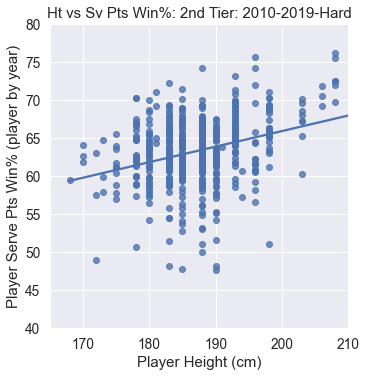

In [60]:
#Plot for Tier 2 (2010-2019; hard court only)

sns.set(font_scale=1.25)

p = sns.lmplot(x="p_ht", y="p_sv_pts_won%", data=pts_df_filter_hard_secondtier_2010to2019, hue="rank_tier", palette=["b"], legend=None, ci=None)

p.set(xlim=(165, 210))
p.set(ylim=(40, 80))
p.set(xlabel = "Player Height (cm)")
p.set(ylabel = "Player Serve Pts Win% (player by year)")
p.set(title = "Ht vs Sv Pts Win%: 2nd Tier: 2010-2019-Hard")

In [61]:
# Third Tier Only
df_filter_hard_thirdtier_2010to2019 = df_filter_hard_2010to2019.loc[(df_filter_hard_2010to2019["rank_tier"] == "51-125")]
df_filter_hard_thirdtier_2010to2019

,t_id,t_surf,tour_yr,p_id,p_name,p_ht,p_age,p_rank,p_pts_won%,p_sv_pts_won%,p_ret_pts_won%,p_ace%,p_aced%,p_bp_save%,p_bp_convert%,rank_tier,round_age
212,2019-7696,Hard,2019,206173,Jannik Sinner,188.0,18.22,95.0,62.50,72.73,52.27,9.09,4.55,100.00,50.0,51-125,18.0
213,2019-7485,Hard,2019,206173,Jannik Sinner,188.0,18.16,119.0,60.19,77.27,47.46,4.55,15.25,100.00,40.0,51-125,18.0
214,2019-7696,Hard,2019,206173,Jannik Sinner,188.0,18.22,95.0,59.14,69.23,46.34,3.85,4.88,100.00,37.5,51-125,18.0
215,2019-7485,Hard,2019,206173,Jannik Sinner,188.0,18.16,119.0,55.86,67.31,45.76,5.77,6.78,0.00,50.0,51-125,18.0
216,2019-7696,Hard,2019,206173,Jannik Sinner,188.0,18.22,95.0,53.66,70.77,34.48,7.69,3.45,88.89,37.5,51-125,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117330,2015-422,Hard,2015,100644,Alexander Zverev,198.0,18.32,85.0,50.93,66.67,34.91,12.96,3.77,60.00,25.0,51-125,18.0
117331,2015-341,Hard,2015,100644,Alexander Zverev,198.0,18.42,79.0,45.15,60.36,27.37,6.31,13.68,70.00,0.0,51-125,18.0
117333,2015-6003,Hard,2015,100644,Alexander Zverev,198.0,18.44,78.0,42.95,54.44,27.27,3.33,9.09,42.86,50.0,51-125,18.0
117334,2015-418,Hard,2015,100644,Alexander Zverev,198.0,18.29,96.0,45.39,58.23,31.51,5.06,10.96,25.00,50.0,51-125,18.0


In [62]:
pts_df_filter_hard_thirdtier_2010to2019 = df_filter_hard_thirdtier_2010to2019.groupby(['tour_yr','rank_tier','p_id', 'p_ht'], as_index=False)['p_sv_pts_won%'].mean()
pts_df_filter_hard_thirdtier_2010to2019

,tour_yr,rank_tier,p_id,p_ht,p_sv_pts_won%
0,2010,51-125,102148,178.0,59.260000
1,2010,51-125,102783,180.0,60.968000
2,2010,51-125,102839,188.0,58.250000
3,2010,51-125,102967,188.0,62.807143
4,2010,51-125,103096,173.0,61.653846
...,...,...,...,...,...
1098,2019,51-125,200005,188.0,66.465217
1099,2019,51-125,200175,183.0,66.804444
1100,2019,51-125,200221,183.0,57.080000
1101,2019,51-125,200615,196.0,63.899333


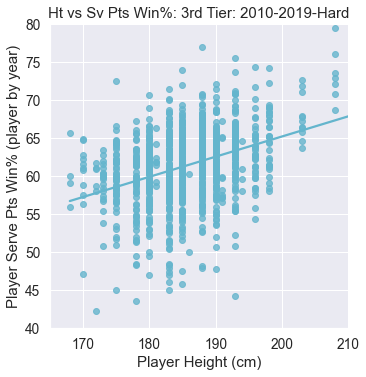

In [63]:
#Plot for Tier 3 (2010-2019; hard court only)

sns.set(font_scale=1.25)

p = sns.lmplot(x="p_ht", y="p_sv_pts_won%", data=pts_df_filter_hard_thirdtier_2010to2019, hue="rank_tier", palette=["c"], legend=None, ci=None)

p.set(xlim=(165, 210))
p.set(ylim=(40, 80))
p.set(xlabel = "Player Height (cm)")
p.set(ylabel = "Player Serve Pts Win% (player by year)")
p.set(title = "Ht vs Sv Pts Win%: 3rd Tier: 2010-2019-Hard")

In [64]:
# Fourth Tier Only
df_filter_hard_fourthtier_2010to2019 = df_filter_hard_2010to2019.loc[(df_filter_hard_2010to2019["rank_tier"] == "126-200")]
df_filter_hard_fourthtier_2010to2019

,t_id,t_surf,tour_yr,p_id,p_name,p_ht,p_age,p_rank,p_pts_won%,p_sv_pts_won%,p_ret_pts_won%,p_ace%,p_aced%,p_bp_save%,p_bp_convert%,rank_tier,round_age
222,2019-0568,Hard,2019,206173,Jannik Sinner,188.0,18.08,127.0,48.95,63.93,37.80,9.84,1.22,40.00,18.18,126-200,18.0
224,2019-560,Hard,2019,206173,Jannik Sinner,188.0,18.03,137.0,47.41,61.48,35.81,1.64,10.14,50.00,28.57,126-200,18.0
228,2019-580,Hard,2019,200615,Alexei Popyrin,196.0,19.44,149.0,56.21,71.26,40.24,14.94,1.22,100.00,30.00,126-200,19.0
229,2019-M006,Hard,2019,200615,Alexei Popyrin,196.0,19.58,131.0,51.63,58.67,44.87,4.00,6.41,66.67,80.00,126-200,20.0
230,2019-580,Hard,2019,200615,Alexei Popyrin,196.0,19.44,149.0,55.50,82.47,33.88,16.49,8.26,100.00,16.67,126-200,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117335,2015-403,Hard,2015,100644,Alexander Zverev,198.0,17.92,129.0,46.53,62.32,32.00,4.35,4.00,60.00,33.33,126-200,18.0
117337,2015-496,Hard,2015,100644,Alexander Zverev,198.0,17.83,138.0,45.53,56.52,31.48,2.90,11.11,50.00,100.00,126-200,18.0
117339,2015-495,Hard,2015,100644,Alexander Zverev,198.0,17.85,136.0,44.17,61.11,30.30,11.11,10.61,57.14,100.00,126-200,18.0
117340,2015-407,Hard,2015,100644,Alexander Zverev,198.0,17.81,137.0,36.46,50.98,20.00,13.73,6.67,50.00,0.00,126-200,18.0


In [65]:
pts_df_filter_hard_fourthtier_2010to2019 = df_filter_hard_fourthtier_2010to2019.groupby(['tour_yr','rank_tier','p_id', 'p_ht'], as_index=False)['p_sv_pts_won%'].mean()
pts_df_filter_hard_fourthtier_2010to2019

,tour_yr,rank_tier,p_id,p_ht,p_sv_pts_won%
0,2010,126-200,102887,185.0,59.90000
1,2010,126-200,102905,175.0,61.45600
2,2010,126-200,102967,188.0,58.82000
3,2010,126-200,103103,183.0,43.48000
4,2010,126-200,103240,180.0,45.61000
...,...,...,...,...,...
676,2019,126-200,144707,183.0,60.67000
677,2019,126-200,144895,178.0,62.50000
678,2019,126-200,200175,183.0,70.79200
679,2019,126-200,200615,196.0,61.32125


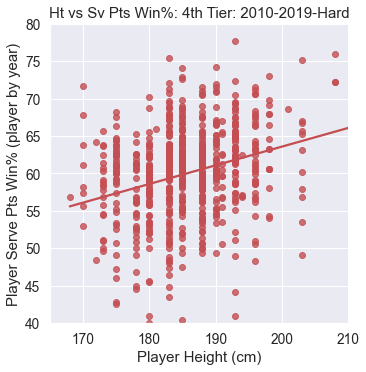

In [66]:
#Plot for Tier 4 (2010-2019; hard court only)

sns.set(font_scale=1.25)

p = sns.lmplot(x="p_ht", y="p_sv_pts_won%", data=pts_df_filter_hard_fourthtier_2010to2019, hue="rank_tier", palette=["r"], legend=None, ci=None)

p.set(xlim=(165, 210))
p.set(ylim=(40, 80))
p.set(xlabel = "Player Height (cm)")
p.set(ylabel = "Player Serve Pts Win% (player by year)")
p.set(title = "Ht vs Sv Pts Win%: 4th Tier: 2010-2019-Hard")

### age vs serve performance

In [67]:
sv_perc_win_by_yr_plyr_rt_surf_age = df.groupby(['tour_yr','t_surf', 'p_id', 'round_age'], as_index=False)['p_sv_pts_won%'].mean()
sv_perc_win_by_yr_plyr_rt_surf_age

,tour_yr,t_surf,p_id,round_age,p_sv_pts_won%
0,1995,Clay,100757,34.0,59.130000
1,1995,Clay,100837,33.0,52.515000
2,1995,Clay,100936,32.0,55.368889
3,1995,Clay,101016,31.0,56.650000
4,1995,Clay,101026,31.0,54.330000
...,...,...,...,...,...
12096,2019,Hard,200282,20.0,69.969545
12097,2019,Hard,200282,21.0,66.691250
12098,2019,Hard,200615,19.0,67.076000
12099,2019,Hard,200615,20.0,61.871111


In [68]:
#Hard Court Only
df_hc_filter_age = sv_perc_win_by_yr_plyr_rt_surf_age.loc[(sv_perc_win_by_yr_plyr_rt_surf_age["t_surf"] == "Hard")]
df_hc_filter_age

,tour_yr,t_surf,p_id,round_age,p_sv_pts_won%
231,1995,Hard,100757,34.0,63.260000
232,1995,Hard,100763,33.0,61.425000
233,1995,Hard,100763,34.0,53.287500
234,1995,Hard,100837,33.0,58.675769
235,1995,Hard,100870,32.0,53.190000
...,...,...,...,...,...
12096,2019,Hard,200282,20.0,69.969545
12097,2019,Hard,200282,21.0,66.691250
12098,2019,Hard,200615,19.0,67.076000
12099,2019,Hard,200615,20.0,61.871111


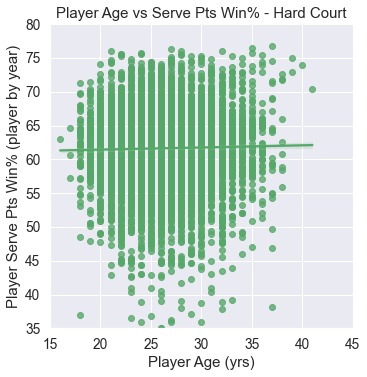

In [69]:
#Plot for hard court only

sns.set(font_scale=1.25)

p = sns.lmplot(x="round_age", y="p_sv_pts_won%", data=df_hc_filter_age, hue="t_surf", palette=["g"], legend=None)

p.set(xlim=(15, 45))
p.set(ylim=(35, 80))
p.set(xlabel = "Player Age (yrs)")
p.set(ylabel = "Player Serve Pts Win% (player by year)")
p.set(title = "Player Age vs Serve Pts Win% - Hard Court")

In [70]:
#Clay Court Only
df_cc_filter_age = sv_perc_win_by_yr_plyr_rt_surf_age.loc[(sv_perc_win_by_yr_plyr_rt_surf_age["t_surf"] == "Clay")]
df_cc_filter_age

,tour_yr,t_surf,p_id,round_age,p_sv_pts_won%
0,1995,Clay,100757,34.0,59.130000
1,1995,Clay,100837,33.0,52.515000
2,1995,Clay,100936,32.0,55.368889
3,1995,Clay,101016,31.0,56.650000
4,1995,Clay,101026,31.0,54.330000
...,...,...,...,...,...
11821,2019,Clay,200175,20.0,53.323333
11822,2019,Clay,200221,20.0,58.591111
11823,2019,Clay,200282,20.0,58.604000
11824,2019,Clay,200484,19.0,62.068000


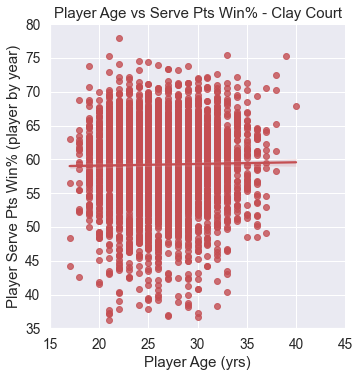

In [71]:
#Plot for clay court only

sns.set(font_scale=1.25)

p = sns.lmplot(x="round_age", y="p_sv_pts_won%", data=df_cc_filter_age, hue="t_surf", palette=["r"], legend=None)

p.set(xlim=(15, 45))
p.set(ylim=(35, 80))
p.set(xlabel = "Player Age (yrs)")
p.set(ylabel = "Player Serve Pts Win% (player by year)")
p.set(title = "Player Age vs Serve Pts Win% - Clay Court")

### Age vs Serve Performance: Last Decade vs First 15 Years

In [72]:
df_1995to2009 = df[(df['tour_yr'] <= 2009)]
df_1995to2009.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74009 entries, 0 to 117071
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   t_id            74009 non-null  object 
 1   t_surf          74009 non-null  object 
 2   tour_yr         74009 non-null  int64  
 3   p_id            74009 non-null  int64  
 4   p_name          74009 non-null  object 
 5   p_ht            74009 non-null  float64
 6   p_age           74009 non-null  float64
 7   p_rank          74009 non-null  float64
 8   p_pts_won%      74009 non-null  float64
 9   p_sv_pts_won%   74007 non-null  float64
 10  p_ret_pts_won%  74006 non-null  float64
 11  p_ace%          74007 non-null  float64
 12  p_aced%         74006 non-null  float64
 13  p_bp_save%      74009 non-null  float64
 14  p_bp_convert%   74009 non-null  float64
 15  rank_tier       74009 non-null  object 
 16  round_age       74009 non-null  float64
dtypes: float64(11), int64(2), obje

In [73]:
df_2010to2019 = df[(df['tour_yr'] >= 2010)]
df_2010to2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43336 entries, 212 to 117344
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   t_id            43336 non-null  object 
 1   t_surf          43336 non-null  object 
 2   tour_yr         43336 non-null  int64  
 3   p_id            43336 non-null  int64  
 4   p_name          43336 non-null  object 
 5   p_ht            43336 non-null  float64
 6   p_age           43336 non-null  float64
 7   p_rank          43336 non-null  float64
 8   p_pts_won%      43336 non-null  float64
 9   p_sv_pts_won%   43336 non-null  float64
 10  p_ret_pts_won%  43336 non-null  float64
 11  p_ace%          43336 non-null  float64
 12  p_aced%         43336 non-null  float64
 13  p_bp_save%      43336 non-null  float64
 14  p_bp_convert%   43336 non-null  float64
 15  rank_tier       43336 non-null  object 
 16  round_age       43336 non-null  float64
dtypes: float64(11), int64(2), ob

In [74]:
# Age vs SV Performance: Hard Court Data For 1995-2009
sv_perc_win_by_yr_plyr_rt_surf_age = df_1995to2009.groupby(['tour_yr','t_surf', 'p_id', 'round_age'], as_index=False)['p_sv_pts_won%'].mean()
sv_perc_win_by_yr_plyr_rt_surf_age

,tour_yr,t_surf,p_id,round_age,p_sv_pts_won%
0,1995,Clay,100757,34.0,59.130000
1,1995,Clay,100837,33.0,52.515000
2,1995,Clay,100936,32.0,55.368889
3,1995,Clay,101016,31.0,56.650000
4,1995,Clay,101026,31.0,54.330000
...,...,...,...,...,...
7505,2009,Hard,105227,20.0,67.733500
7506,2009,Hard,105227,21.0,65.526923
7507,2009,Hard,105238,21.0,53.060000
7508,2009,Hard,105385,20.0,56.072500


In [75]:
#Hard Court Only
df_hc_filter_age = sv_perc_win_by_yr_plyr_rt_surf_age.loc[(sv_perc_win_by_yr_plyr_rt_surf_age["t_surf"] == "Hard")]
df_hc_filter_age

,tour_yr,t_surf,p_id,round_age,p_sv_pts_won%
231,1995,Hard,100757,34.0,63.260000
232,1995,Hard,100763,33.0,61.425000
233,1995,Hard,100763,34.0,53.287500
234,1995,Hard,100837,33.0,58.675769
235,1995,Hard,100870,32.0,53.190000
...,...,...,...,...,...
7505,2009,Hard,105227,20.0,67.733500
7506,2009,Hard,105227,21.0,65.526923
7507,2009,Hard,105238,21.0,53.060000
7508,2009,Hard,105385,20.0,56.072500


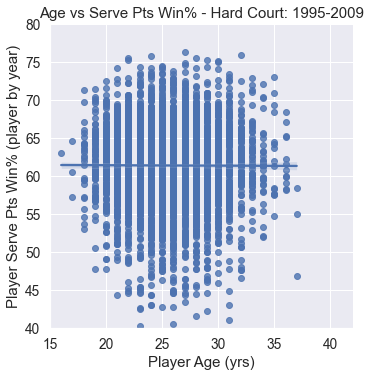

In [76]:
#Serve Performance vs Age Plot for hard court only, and only for 1995-2009

sns.set(font_scale=1.25)

p = sns.lmplot(x="round_age", y="p_sv_pts_won%", data=df_hc_filter_age, hue="t_surf", palette=["b"], legend=None)

p.set(xlim=(15, 42))
p.set(ylim=(40, 80))
p.set(xlabel = "Player Age (yrs)")
p.set(ylabel = "Player Serve Pts Win% (player by year)")
p.set(title = "Age vs Serve Pts Win% - Hard Court: 1995-2009")

In [77]:
# Age vs SV Performance: Hard Court Data For 2010-2019
sv_perc_win_by_yr_plyr_rt_surf_age = df_2010to2019.groupby(['tour_yr','t_surf', 'p_id', 'round_age'], as_index=False)['p_sv_pts_won%'].mean()
sv_perc_win_by_yr_plyr_rt_surf_age

,tour_yr,t_surf,p_id,round_age,p_sv_pts_won%
0,2010,Clay,102783,34.0,59.180000
1,2010,Clay,102839,33.0,46.580000
2,2010,Clay,102839,34.0,53.093333
3,2010,Clay,102905,33.0,54.290000
4,2010,Clay,102967,33.0,51.100000
...,...,...,...,...,...
4586,2019,Hard,200282,20.0,69.969545
4587,2019,Hard,200282,21.0,66.691250
4588,2019,Hard,200615,19.0,67.076000
4589,2019,Hard,200615,20.0,61.871111


In [78]:
#Hard Court Only
df_hc_filter_age = sv_perc_win_by_yr_plyr_rt_surf_age.loc[(sv_perc_win_by_yr_plyr_rt_surf_age["t_surf"] == "Hard")]
df_hc_filter_age

,tour_yr,t_surf,p_id,round_age,p_sv_pts_won%
195,2010,Hard,102148,37.0,59.260000
196,2010,Hard,102783,34.0,60.968000
197,2010,Hard,102839,33.0,52.990000
198,2010,Hard,102839,34.0,60.003333
199,2010,Hard,102887,33.0,59.900000
...,...,...,...,...,...
4586,2019,Hard,200282,20.0,69.969545
4587,2019,Hard,200282,21.0,66.691250
4588,2019,Hard,200615,19.0,67.076000
4589,2019,Hard,200615,20.0,61.871111


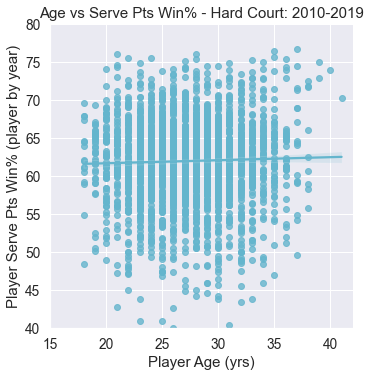

In [79]:
#Serve Performance vs Age Plot for hard court only, and only for 2010-2019

sns.set(font_scale=1.25)

p = sns.lmplot(x="round_age", y="p_sv_pts_won%", data=df_hc_filter_age, hue="t_surf", palette=["c"], legend=None)

p.set(xlim=(15, 42))
p.set(ylim=(40, 80))
p.set(xlabel = "Player Age (yrs)")
p.set(ylabel = "Player Serve Pts Win% (player by year)")
p.set(title = "Age vs Serve Pts Win% - Hard Court: 2010-2019")

### Age vs Return Performance: Last Decade vs First 15 Years

In [80]:
# Age vs Return Performance: Hard Court Data For 1995-2009
ret_perc_win_by_yr_plyr_rt_surf_age = df_1995to2009.groupby(['tour_yr','t_surf', 'p_id', 'round_age'], as_index=False)['p_ret_pts_won%'].mean()
ret_perc_win_by_yr_plyr_rt_surf_age

,tour_yr,t_surf,p_id,round_age,p_ret_pts_won%
0,1995,Clay,100757,34.0,32.420000
1,1995,Clay,100837,33.0,40.580000
2,1995,Clay,100936,32.0,32.426667
3,1995,Clay,101016,31.0,40.860000
4,1995,Clay,101026,31.0,32.170000
...,...,...,...,...,...
7505,2009,Hard,105227,20.0,40.211000
7506,2009,Hard,105227,21.0,39.378462
7507,2009,Hard,105238,21.0,23.810000
7508,2009,Hard,105385,20.0,31.950000


In [81]:
#Hard Court Only
df_hc_filter_age = ret_perc_win_by_yr_plyr_rt_surf_age.loc[(ret_perc_win_by_yr_plyr_rt_surf_age["t_surf"] == "Hard")]
df_hc_filter_age

,tour_yr,t_surf,p_id,round_age,p_ret_pts_won%
231,1995,Hard,100757,34.0,33.060000
232,1995,Hard,100763,33.0,24.385000
233,1995,Hard,100763,34.0,36.997500
234,1995,Hard,100837,33.0,34.446538
235,1995,Hard,100870,32.0,32.730000
...,...,...,...,...,...
7505,2009,Hard,105227,20.0,40.211000
7506,2009,Hard,105227,21.0,39.378462
7507,2009,Hard,105238,21.0,23.810000
7508,2009,Hard,105385,20.0,31.950000


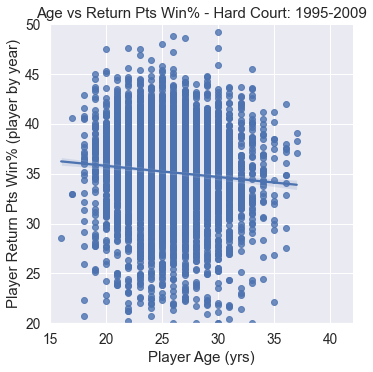

In [82]:
#Return Performance vs Age Plot for hard court only, and only for 1995-2009

sns.set(font_scale=1.25)

p = sns.lmplot(x="round_age", y="p_ret_pts_won%", data=df_hc_filter_age, hue="t_surf", palette=["b"], legend=None)

p.set(xlim=(15, 42))
p.set(ylim=(20, 50))
p.set(xlabel = "Player Age (yrs)")
p.set(ylabel = "Player Return Pts Win% (player by year)")
p.set(title = "Age vs Return Pts Win% - Hard Court: 1995-2009")

In [83]:
# Age vs Return Performance: Hard Court Data For 2010-2019
ret_perc_win_by_yr_plyr_rt_surf_age = df_2010to2019.groupby(['tour_yr','t_surf', 'p_id', 'round_age'], as_index=False)['p_ret_pts_won%'].mean()
ret_perc_win_by_yr_plyr_rt_surf_age

,tour_yr,t_surf,p_id,round_age,p_ret_pts_won%
0,2010,Clay,102783,34.0,31.730000
1,2010,Clay,102839,33.0,36.070000
2,2010,Clay,102839,34.0,33.993333
3,2010,Clay,102905,33.0,42.480000
4,2010,Clay,102967,33.0,36.190000
...,...,...,...,...,...
4586,2019,Hard,200282,20.0,36.397273
4587,2019,Hard,200282,21.0,39.850833
4588,2019,Hard,200615,19.0,32.802000
4589,2019,Hard,200615,20.0,31.290000


In [84]:
#Hard Court Only
df_hc_filter_age = ret_perc_win_by_yr_plyr_rt_surf_age.loc[(ret_perc_win_by_yr_plyr_rt_surf_age["t_surf"] == "Hard")]
df_hc_filter_age

,tour_yr,t_surf,p_id,round_age,p_ret_pts_won%
195,2010,Hard,102148,37.0,30.430000
196,2010,Hard,102783,34.0,38.082000
197,2010,Hard,102839,33.0,33.640000
198,2010,Hard,102839,34.0,34.450000
199,2010,Hard,102887,33.0,38.530000
...,...,...,...,...,...
4586,2019,Hard,200282,20.0,36.397273
4587,2019,Hard,200282,21.0,39.850833
4588,2019,Hard,200615,19.0,32.802000
4589,2019,Hard,200615,20.0,31.290000


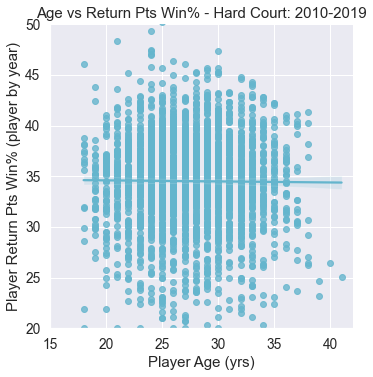

In [85]:
#Return Performance vs Age Plot for hard court only, and only for 2010-2019

sns.set(font_scale=1.25)

p = sns.lmplot(x="round_age", y="p_ret_pts_won%", data=df_hc_filter_age, hue="t_surf", palette=["c"], legend=None)

p.set(xlim=(15, 42))
p.set(ylim=(20, 50))
p.set(xlabel = "Player Age (yrs)")
p.set(ylabel = "Player Return Pts Win% (player by year)")
p.set(title = "Age vs Return Pts Win% - Hard Court: 2010-2019")

### 1995-2009 vs 2010-2019 OVERALL Performance Comparison

#### First, for 1995-2009

In [86]:
# Age vs Overall Performance: Hard Court Data For 1995-2009
pts_perc_win_by_yr_plyr_rt_surf_age = df_1995to2009.groupby(['tour_yr','t_surf', 'p_id', 'round_age'], as_index=False)['p_pts_won%'].mean()
pts_perc_win_by_yr_plyr_rt_surf_age

,tour_yr,t_surf,p_id,round_age,p_pts_won%
0,1995,Clay,100757,34.0,46.225000
1,1995,Clay,100837,33.0,46.425000
2,1995,Clay,100936,32.0,44.762222
3,1995,Clay,101016,31.0,48.000000
4,1995,Clay,101026,31.0,43.800000
...,...,...,...,...,...
7505,2009,Hard,105227,20.0,53.148000
7506,2009,Hard,105227,21.0,52.186923
7507,2009,Hard,105238,21.0,39.560000
7508,2009,Hard,105385,20.0,44.637500


In [87]:
#Hard Court Only
df_hc_filter_age = pts_perc_win_by_yr_plyr_rt_surf_age.loc[(pts_perc_win_by_yr_plyr_rt_surf_age["t_surf"] == "Hard")]
df_hc_filter_age

,tour_yr,t_surf,p_id,round_age,p_pts_won%
231,1995,Hard,100757,34.0,48.080500
232,1995,Hard,100763,33.0,44.375000
233,1995,Hard,100763,34.0,45.930000
234,1995,Hard,100837,33.0,46.674615
235,1995,Hard,100870,32.0,42.160000
...,...,...,...,...,...
7505,2009,Hard,105227,20.0,53.148000
7506,2009,Hard,105227,21.0,52.186923
7507,2009,Hard,105238,21.0,39.560000
7508,2009,Hard,105385,20.0,44.637500


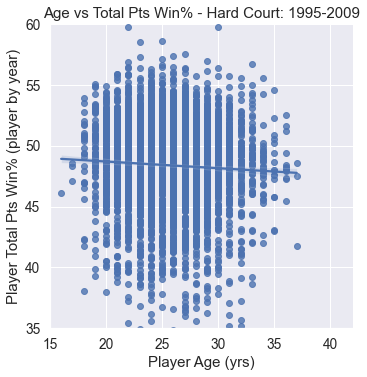

In [88]:
#Overall (total points won%) Performance vs Age Plot for hard court only, and only for 1995-2009

sns.set(font_scale=1.25)

p = sns.lmplot(x="round_age", y="p_pts_won%", data=df_hc_filter_age, hue="t_surf", palette=["b"], legend=None)

p.set(xlim=(15, 42))
p.set(ylim=(35, 60))
p.set(xlabel = "Player Age (yrs)")
p.set(ylabel = "Player Total Pts Win% (player by year)")
p.set(title = "Age vs Total Pts Win% - Hard Court: 1995-2009")

#### Now, for 2010-2019

In [89]:
# Age vs Overall Performance: Hard Court Data For 2010-2019
pts_perc_win_by_yr_plyr_rt_surf_age = df_2010to2019.groupby(['tour_yr','t_surf', 'p_id', 'round_age'], as_index=False)['p_pts_won%'].mean()
pts_perc_win_by_yr_plyr_rt_surf_age

,tour_yr,t_surf,p_id,round_age,p_pts_won%
0,2010,Clay,102783,34.0,45.050000
1,2010,Clay,102839,33.0,41.790000
2,2010,Clay,102839,34.0,43.393333
3,2010,Clay,102905,33.0,48.170000
4,2010,Clay,102967,33.0,44.000000
...,...,...,...,...,...
4586,2019,Hard,200282,20.0,52.699091
4587,2019,Hard,200282,21.0,52.877917
4588,2019,Hard,200615,19.0,49.646000
4589,2019,Hard,200615,20.0,47.215000


In [90]:
#Hard Court Only
df_hc_filter_age = pts_perc_win_by_yr_plyr_rt_surf_age.loc[(pts_perc_win_by_yr_plyr_rt_surf_age["t_surf"] == "Hard")]
df_hc_filter_age

,tour_yr,t_surf,p_id,round_age,p_pts_won%
195,2010,Hard,102148,37.0,46.000000
196,2010,Hard,102783,34.0,49.618500
197,2010,Hard,102839,33.0,43.610000
198,2010,Hard,102839,34.0,47.516667
199,2010,Hard,102887,33.0,49.095000
...,...,...,...,...,...
4586,2019,Hard,200282,20.0,52.699091
4587,2019,Hard,200282,21.0,52.877917
4588,2019,Hard,200615,19.0,49.646000
4589,2019,Hard,200615,20.0,47.215000


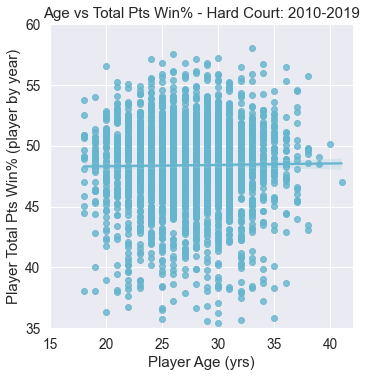

In [91]:
#Overall (total points won%) Performance vs Age Plot for hard court only, and only for 2010-2019

sns.set(font_scale=1.25)

p = sns.lmplot(x="round_age", y="p_pts_won%", data=df_hc_filter_age, hue="t_surf", palette=["c"], legend=None)

p.set(xlim=(15, 42))
p.set(ylim=(35, 60))
p.set(xlabel = "Player Age (yrs)")
p.set(ylabel = "Player Total Pts Win% (player by year)")
p.set(title = "Age vs Total Pts Win% - Hard Court: 2010-2019")

## Return Performance Relative to Height

In [92]:
ret_pts_win = df.groupby(['tour_yr','t_surf', 'p_id', 'p_ht'], as_index=False)['p_ret_pts_won%'].mean()
ret_pts_win

,tour_yr,t_surf,p_id,p_ht,p_ret_pts_won%
0,1995,Clay,100757,180.0,32.420000
1,1995,Clay,100837,180.0,40.580000
2,1995,Clay,100936,185.0,32.426667
3,1995,Clay,101016,185.0,40.860000
4,1995,Clay,101026,193.0,32.170000
...,...,...,...,...,...
8834,2019,Hard,200175,183.0,36.030968
8835,2019,Hard,200221,183.0,24.976667
8836,2019,Hard,200282,183.0,38.199130
8837,2019,Hard,200615,196.0,31.618696


#### Hard courts

In [93]:
#Hard Court Only
df_hc_filter = ret_pts_win.loc[(ret_pts_win["t_surf"] == "Hard")]
df_hc_filter

,tour_yr,t_surf,p_id,p_ht,p_ret_pts_won%
183,1995,Hard,100757,180.0,33.060000
184,1995,Hard,100763,185.0,32.793333
185,1995,Hard,100837,180.0,34.446538
186,1995,Hard,100870,185.0,32.730000
187,1995,Hard,100923,180.0,31.521111
...,...,...,...,...,...
8834,2019,Hard,200175,183.0,36.030968
8835,2019,Hard,200221,183.0,24.976667
8836,2019,Hard,200282,183.0,38.199130
8837,2019,Hard,200615,196.0,31.618696


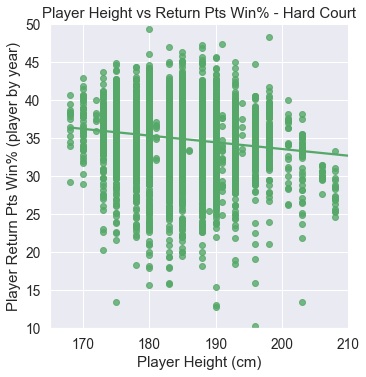

In [94]:
#Plot for hard court only

sns.set(font_scale=1.25)

p = sns.lmplot(x="p_ht", y="p_ret_pts_won%", data=df_hc_filter, hue="t_surf", palette=["g"], legend=None, ci=None)

p.set(xlim=(165, 210))
p.set(ylim=(10, 50))
p.set(xlabel = "Player Height (cm)")
p.set(ylabel = "Player Return Pts Win% (player by year)")
p.set(title = "Player Height vs Return Pts Win% - Hard Court")

#### Clay Courts

In [95]:
#Clay Court Only
df_cc_filter = ret_pts_win.loc[(ret_pts_win["t_surf"] == "Clay")]
df_cc_filter

,tour_yr,t_surf,p_id,p_ht,p_ret_pts_won%
0,1995,Clay,100757,180.0,32.420000
1,1995,Clay,100837,180.0,40.580000
2,1995,Clay,100936,185.0,32.426667
3,1995,Clay,101016,185.0,40.860000
4,1995,Clay,101026,193.0,32.170000
...,...,...,...,...,...
8650,2019,Clay,200175,183.0,32.233333
8651,2019,Clay,200221,183.0,40.161111
8652,2019,Clay,200282,183.0,33.752000
8653,2019,Clay,200484,185.0,28.298000


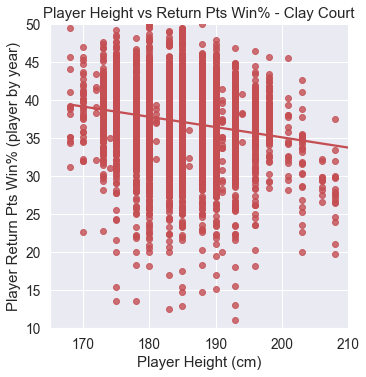

In [96]:
#Plot for clay court only

sns.set(font_scale=1.25)

p = sns.lmplot(x="p_ht", y="p_ret_pts_won%", data=df_cc_filter, hue="t_surf", palette=["r"], legend=None, ci=None)

p.set(xlim=(165, 210))
p.set(ylim=(10, 50))
p.set(xlabel = "Player Height (cm)")
p.set(ylabel = "Player Return Pts Win% (player by year)")
p.set(title = "Player Height vs Return Pts Win% - Clay Court")

## Overall Pts Performance vs Height

In [97]:
tot_pts_win = df.groupby(['tour_yr','t_surf', 'p_id', 'p_ht'], as_index=False)['p_pts_won%'].mean()
tot_pts_win

,tour_yr,t_surf,p_id,p_ht,p_pts_won%
0,1995,Clay,100757,180.0,46.225000
1,1995,Clay,100837,180.0,46.425000
2,1995,Clay,100936,185.0,44.762222
3,1995,Clay,101016,185.0,48.000000
4,1995,Clay,101026,193.0,43.800000
...,...,...,...,...,...
8834,2019,Hard,200175,183.0,50.838065
8835,2019,Hard,200221,183.0,42.286667
8836,2019,Hard,200282,183.0,52.792391
8837,2019,Hard,200615,196.0,47.743478


#### Hard Court

In [98]:
df_hc_filter = tot_pts_win.loc[(tot_pts_win["t_surf"] == "Hard")]
df_hc_filter

,tour_yr,t_surf,p_id,p_ht,p_pts_won%
183,1995,Hard,100757,180.0,48.080500
184,1995,Hard,100763,185.0,45.411667
185,1995,Hard,100837,180.0,46.674615
186,1995,Hard,100870,185.0,42.160000
187,1995,Hard,100923,180.0,46.565556
...,...,...,...,...,...
8834,2019,Hard,200175,183.0,50.838065
8835,2019,Hard,200221,183.0,42.286667
8836,2019,Hard,200282,183.0,52.792391
8837,2019,Hard,200615,196.0,47.743478


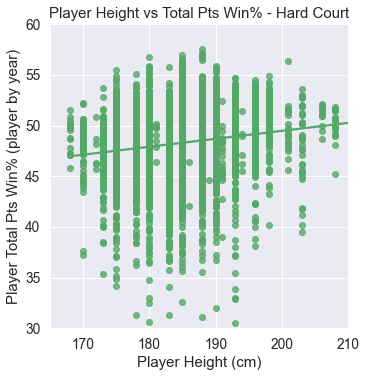

In [99]:
#Plot for hard court only

sns.set(font_scale=1.25)

p = sns.lmplot(x="p_ht", y="p_pts_won%", data=df_hc_filter, hue="t_surf", palette=["g"], legend=None, ci=None)

p.set(xlim=(165, 210))
p.set(ylim=(30, 60))
p.set(xlabel = "Player Height (cm)")
p.set(ylabel = "Player Total Pts Win% (player by year)")
p.set(title = "Player Height vs Total Pts Win% - Hard Court")

In [100]:
df_cc_filter = tot_pts_win.loc[(tot_pts_win["t_surf"] == "Clay")]
df_cc_filter

,tour_yr,t_surf,p_id,p_ht,p_pts_won%
0,1995,Clay,100757,180.0,46.225000
1,1995,Clay,100837,180.0,46.425000
2,1995,Clay,100936,185.0,44.762222
3,1995,Clay,101016,185.0,48.000000
4,1995,Clay,101026,193.0,43.800000
...,...,...,...,...,...
8650,2019,Clay,200175,183.0,43.540000
8651,2019,Clay,200221,183.0,49.644444
8652,2019,Clay,200282,183.0,46.292000
8653,2019,Clay,200484,185.0,46.312000


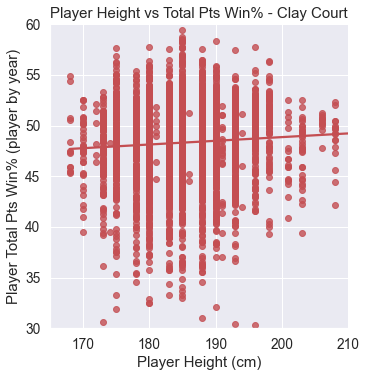

In [101]:
#Plot for clay court only

sns.set(font_scale=1.25)

p = sns.lmplot(x="p_ht", y="p_pts_won%", data=df_cc_filter, hue="t_surf", palette=["r"], legend=None, ci=None)

p.set(xlim=(165, 210))
p.set(ylim=(30, 60))
p.set(xlabel = "Player Height (cm)")
p.set(ylabel = "Player Total Pts Win% (player by year)")
p.set(title = "Player Height vs Total Pts Win% - Clay Court")

### Height Vs Overall Performance By Tier (Hard Court Only)

In [102]:
#Hard Court Only
df_filter_hard = df.loc[(df["t_surf"] == "Hard")]
df_filter_hard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74175 entries, 3 to 117344
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   t_id            74175 non-null  object 
 1   t_surf          74175 non-null  object 
 2   tour_yr         74175 non-null  int64  
 3   p_id            74175 non-null  int64  
 4   p_name          74175 non-null  object 
 5   p_ht            74175 non-null  float64
 6   p_age           74175 non-null  float64
 7   p_rank          74175 non-null  float64
 8   p_pts_won%      74175 non-null  float64
 9   p_sv_pts_won%   74174 non-null  float64
 10  p_ret_pts_won%  74173 non-null  float64
 11  p_ace%          74174 non-null  float64
 12  p_aced%         74173 non-null  float64
 13  p_bp_save%      74175 non-null  float64
 14  p_bp_convert%   74175 non-null  float64
 15  rank_tier       74175 non-null  object 
 16  round_age       74175 non-null  float64
dtypes: float64(11), int64(2), obje

In [103]:
# Top Tier Only
df_filter_hard_toptier = df_filter_hard.loc[(df_filter_hard["rank_tier"] == "<=25")]
df_filter_hard_toptier

,t_id,t_surf,tour_yr,p_id,p_name,p_ht,p_age,p_rank,p_pts_won%,p_sv_pts_won%,p_ret_pts_won%,p_ace%,p_aced%,p_bp_save%,p_bp_convert%,rank_tier,round_age
261,2019-7696,Hard,2019,200282,Alex De Minaur,183.0,20.71,18.0,62.79,80.00,50.98,8.57,3.92,100.00,41.67,<=25,21.0
263,2019-0352,Hard,2019,200282,Alex De Minaur,183.0,20.69,18.0,58.16,65.31,51.02,6.12,8.16,0.00,83.33,<=25,21.0
265,2019-7696,Hard,2019,200282,Alex De Minaur,183.0,20.71,18.0,51.75,65.45,38.98,14.55,10.17,50.00,100.00,<=25,21.0
271,2019-7696,Hard,2019,200282,Alex De Minaur,183.0,20.71,18.0,57.85,71.43,48.61,10.20,2.78,50.00,29.41,<=25,21.0
272,2019-7696,Hard,2019,200282,Alex De Minaur,183.0,20.71,18.0,57.14,70.77,44.12,4.62,1.47,66.67,83.33,<=25,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117295,2016-0429,Hard,2016,100644,Alexander Zverev,198.0,19.49,20.0,53.12,70.97,36.36,11.29,1.52,50.00,37.50,<=25,19.0
117302,2016-M015,Hard,2016,100644,Alexander Zverev,198.0,19.46,24.0,43.01,46.88,39.18,4.17,3.09,33.33,30.77,<=25,19.0
117303,2016-0421,Hard,2016,100644,Alexander Zverev,198.0,19.26,25.0,44.93,56.72,33.80,4.48,4.23,57.14,16.67,<=25,19.0
117316,2016-5014,Hard,2016,100644,Alexander Zverev,198.0,19.47,21.0,49.30,61.82,35.92,7.27,10.68,50.00,33.33,<=25,19.0


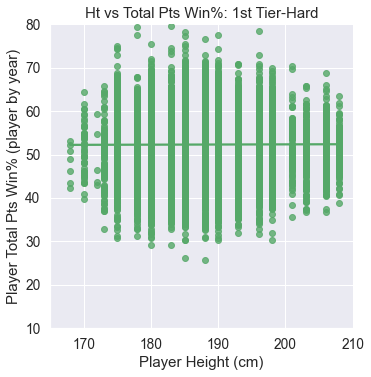

In [104]:
#Plot for Tier 1 (hard court only)

sns.set(font_scale=1.25)

p = sns.lmplot(x="p_ht", y="p_pts_won%", data=df_filter_hard_toptier, hue="rank_tier", palette=["g"], legend=None, ci=None)

p.set(xlim=(165, 210))
p.set(ylim=(10, 80))
p.set(xlabel = "Player Height (cm)")
p.set(ylabel = "Player Total Pts Win% (player by year)")
p.set(title = "Ht vs Total Pts Win%: 1st Tier-Hard")

In [105]:
# Second Tier Only
df_filter_hard_secondtier = df_filter_hard.loc[(df_filter_hard["rank_tier"] == "26-50")]
df_filter_hard_secondtier

,t_id,t_surf,tour_yr,p_id,p_name,p_ht,p_age,p_rank,p_pts_won%,p_sv_pts_won%,p_ret_pts_won%,p_ace%,p_aced%,p_bp_save%,p_bp_convert%,rank_tier,round_age
85,1997-430,Hard,1997,210013,Martin Damm Sr,188.0,24.55,48.0,51.90,61.86,43.36,13.40,2.65,25.00,66.67,26-50,25.0
86,1997-430,Hard,1997,210013,Martin Damm Sr,188.0,24.55,48.0,50.86,61.90,37.74,11.11,5.66,70.00,37.50,26-50,25.0
87,1997-481,Hard,1997,210013,Martin Damm Sr,188.0,24.61,48.0,60.36,71.15,50.85,13.46,3.39,100.00,50.00,26-50,25.0
88,1997-481,Hard,1997,210013,Martin Damm Sr,188.0,24.61,48.0,52.05,62.07,41.67,9.20,11.90,25.00,50.00,26-50,25.0
89,1997-481,Hard,1997,210013,Martin Damm Sr,188.0,24.61,48.0,57.52,79.63,37.29,24.07,25.42,100.00,66.67,26-50,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117298,2016-M035,Hard,2016,100644,Alexander Zverev,198.0,19.24,27.0,56.45,69.84,42.62,11.11,4.92,100.00,42.86,26-50,19.0
117299,2016-M035,Hard,2016,100644,Alexander Zverev,198.0,19.24,27.0,63.27,75.00,53.70,11.36,3.70,100.00,66.67,26-50,19.0
117304,2016-M024,Hard,2016,100644,Alexander Zverev,198.0,19.32,27.0,47.31,61.29,33.33,4.30,3.23,58.33,33.33,26-50,19.0
117318,2016-560,Hard,2016,100644,Alexander Zverev,198.0,19.36,28.0,47.06,58.57,34.85,4.29,0.76,57.14,21.43,26-50,19.0


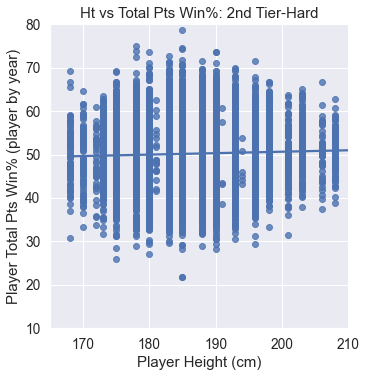

In [106]:
#Plot for Tier 2 (hard court only)

sns.set(font_scale=1.25)

p = sns.lmplot(x="p_ht", y="p_pts_won%", data=df_filter_hard_secondtier, hue="rank_tier", palette=["b"], legend=None, ci=None)

p.set(xlim=(165, 210))
p.set(ylim=(10, 80))
p.set(xlabel = "Player Height (cm)")
p.set(ylabel = "Player Total Pts Win% (player by year)")
p.set(title = "Ht vs Total Pts Win%: 2nd Tier-Hard")

In [107]:
# Third Tier Only
df_filter_hard_thirdtier = df_filter_hard.loc[(df_filter_hard["rank_tier"] == "51-125")]
df_filter_hard_thirdtier

,t_id,t_surf,tour_yr,p_id,p_name,p_ht,p_age,p_rank,p_pts_won%,p_sv_pts_won%,p_ret_pts_won%,p_ace%,p_aced%,p_bp_save%,p_bp_convert%,rank_tier,round_age
3,2000-422,Hard,2000,210013,Martin Damm Sr,188.0,28.02,71.0,52.87,65.52,40.23,6.90,6.90,20.00,44.44,51-125,28.0
6,2000-481,Hard,2000,210013,Martin Damm Sr,188.0,27.58,91.0,51.72,63.16,41.67,9.47,7.41,75.00,23.08,51-125,28.0
7,2000-481,Hard,2000,210013,Martin Damm Sr,188.0,27.58,91.0,52.00,70.11,34.09,12.64,2.27,75.00,25.00,51-125,28.0
8,2000-891,Hard,2000,210013,Martin Damm Sr,188.0,27.40,104.0,66.27,76.09,54.05,15.22,2.70,100.00,80.00,51-125,27.0
9,2000-891,Hard,2000,210013,Martin Damm Sr,188.0,27.40,104.0,59.31,75.00,45.45,13.24,1.30,80.00,50.00,51-125,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117330,2015-422,Hard,2015,100644,Alexander Zverev,198.0,18.32,85.0,50.93,66.67,34.91,12.96,3.77,60.00,25.00,51-125,18.0
117331,2015-341,Hard,2015,100644,Alexander Zverev,198.0,18.42,79.0,45.15,60.36,27.37,6.31,13.68,70.00,0.00,51-125,18.0
117333,2015-6003,Hard,2015,100644,Alexander Zverev,198.0,18.44,78.0,42.95,54.44,27.27,3.33,9.09,42.86,50.00,51-125,18.0
117334,2015-418,Hard,2015,100644,Alexander Zverev,198.0,18.29,96.0,45.39,58.23,31.51,5.06,10.96,25.00,50.00,51-125,18.0


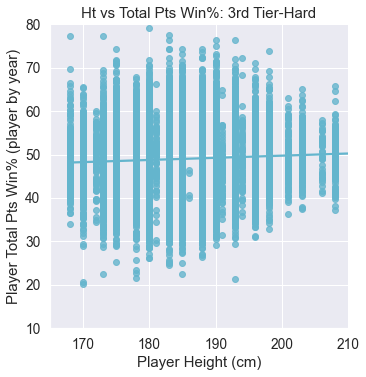

In [108]:
#Plot for Tier 3 (hard court only)

sns.set(font_scale=1.25)

p = sns.lmplot(x="p_ht", y="p_pts_won%", data=df_filter_hard_thirdtier, hue="rank_tier", palette=["c"], legend=None, ci=None)

p.set(xlim=(165, 210))
p.set(ylim=(10, 80))
p.set(xlabel = "Player Height (cm)")
p.set(ylabel = "Player Total Pts Win% (player by year)")
p.set(title = "Ht vs Total Pts Win%: 3rd Tier-Hard")

In [109]:
# Fourth Tier Only
df_filter_hard_fourthtier = df_filter_hard.loc[(df_filter_hard["rank_tier"] == "126-200")]
df_filter_hard_fourthtier

,t_id,t_surf,tour_yr,p_id,p_name,p_ht,p_age,p_rank,p_pts_won%,p_sv_pts_won%,p_ret_pts_won%,p_ace%,p_aced%,p_bp_save%,p_bp_convert%,rank_tier,round_age
222,2019-0568,Hard,2019,206173,Jannik Sinner,188.0,18.08,127.0,48.95,63.93,37.80,9.84,1.22,40.00,18.18,126-200,18.0
224,2019-560,Hard,2019,206173,Jannik Sinner,188.0,18.03,137.0,47.41,61.48,35.81,1.64,10.14,50.00,28.57,126-200,18.0
228,2019-580,Hard,2019,200615,Alexei Popyrin,196.0,19.44,149.0,56.21,71.26,40.24,14.94,1.22,100.00,30.00,126-200,19.0
229,2019-M006,Hard,2019,200615,Alexei Popyrin,196.0,19.58,131.0,51.63,58.67,44.87,4.00,6.41,66.67,80.00,126-200,20.0
230,2019-580,Hard,2019,200615,Alexei Popyrin,196.0,19.44,149.0,55.50,82.47,33.88,16.49,8.26,100.00,16.67,126-200,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117335,2015-403,Hard,2015,100644,Alexander Zverev,198.0,17.92,129.0,46.53,62.32,32.00,4.35,4.00,60.00,33.33,126-200,18.0
117337,2015-496,Hard,2015,100644,Alexander Zverev,198.0,17.83,138.0,45.53,56.52,31.48,2.90,11.11,50.00,100.00,126-200,18.0
117339,2015-495,Hard,2015,100644,Alexander Zverev,198.0,17.85,136.0,44.17,61.11,30.30,11.11,10.61,57.14,100.00,126-200,18.0
117340,2015-407,Hard,2015,100644,Alexander Zverev,198.0,17.81,137.0,36.46,50.98,20.00,13.73,6.67,50.00,0.00,126-200,18.0


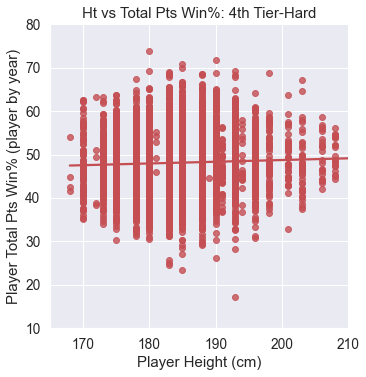

In [110]:
#Plot for Tier 4 (hard court only)

sns.set(font_scale=1.25)

p = sns.lmplot(x="p_ht", y="p_pts_won%", data=df_filter_hard_fourthtier, hue="rank_tier", palette=["r"], legend=None, ci=None)

p.set(xlim=(165, 210))
p.set(ylim=(10, 80))
p.set(xlabel = "Player Height (cm)")
p.set(ylabel = "Player Total Pts Win% (player by year)")
p.set(title = "Ht vs Total Pts Win%: 4th Tier-Hard")

## Relationship Between Height and Age

In [111]:
ht_age_plyr = df.groupby(['p_id', 'round_age', 'p_ht'], as_index=False)['p_ht'].mean()
ht_age_plyr

,p_id,round_age,p_ht
0,100644,17.0,198.0
1,100644,18.0,198.0
2,100644,19.0,198.0
3,100644,20.0,198.0
4,100644,21.0,198.0
...,...,...,...
5255,210013,25.0,188.0
5256,210013,26.0,188.0
5257,210013,27.0,188.0
5258,210013,28.0,188.0


In [112]:
#ht_age_plyr.to_csv('../data/ht_age_plyr.csv', index=False)

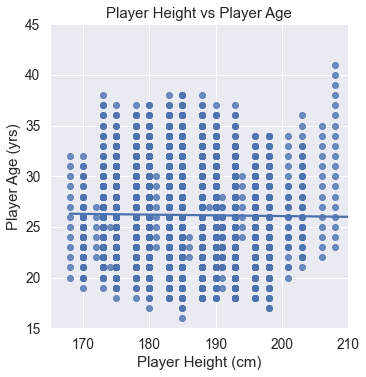

In [113]:
#Plot for height vs age 

sns.set(font_scale=1.25)

p = sns.lmplot(x="p_ht", y="round_age", data=ht_age_plyr, legend=None, ci=None)

p.set(xlim=(165, 210))
p.set(ylim=(15, 45))
p.set(xlabel = "Player Height (cm)")
p.set(ylabel = "Player Age (yrs)")
p.set(title = "Player Height vs Player Age")

### Performance by Both Height and Age

In [114]:
ht_age_plyr_svpts = df.groupby(['p_id', 'round_age', 'p_ht'], as_index=False)['p_sv_pts_won%'].mean()
ht_age_plyr_svpts

,p_id,round_age,p_ht,p_sv_pts_won%
0,100644,17.0,198.0,44.215000
1,100644,18.0,198.0,61.158696
2,100644,19.0,198.0,64.172069
3,100644,20.0,198.0,68.173636
4,100644,21.0,198.0,67.066563
...,...,...,...,...
5255,210013,25.0,188.0,62.357000
5256,210013,26.0,188.0,64.438158
5257,210013,27.0,188.0,62.038571
5258,210013,28.0,188.0,60.576471


In [115]:
#ht_age_plyr_svpts.to_csv('../data/ht_age_plyr_svpts.csv', index=False)

[None]

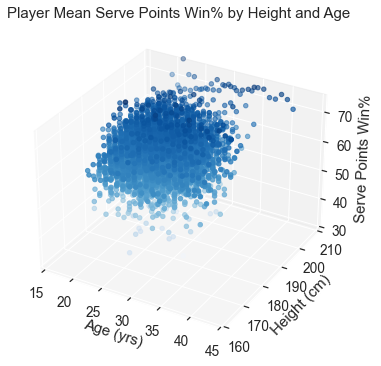

In [116]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
xdata = ht_age_plyr_svpts["round_age"]
ydata = ht_age_plyr_svpts["p_ht"]
zdata = ht_age_plyr_svpts["p_sv_pts_won%"]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Blues');

ax.set_xlim(15, 45)
ax.set_ylim(160, 210)
ax.set_zlim(30, 75)
ax.set_xlabel('Age (yrs)')
ax.set_ylabel('Height (cm)')
ax.set_zlabel('Serve Points Win%')
ax.set_title('Player Mean Serve Points Win% by Height and Age')
ax.set(facecolor='w')
fig.set(facecolor='w')

ValueError: Argument Z must be 2-dimensional.

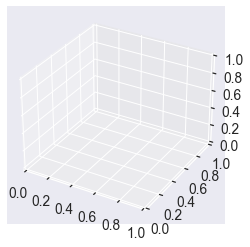

In [117]:
ax = plt.axes(projection='3d')
ax.plot_surface(xdata, ydata, zdata, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

### Ace Performance

In [ ]:
ace_perc_by_ysp = df.groupby(['tour_yr','t_surf','p_id'], as_index=False)['p_ace%'].mean()
ace_perc_by_ysp

In [ ]:
sns.set(font_scale=1.75)

p = sns.relplot(
    data=ace_perc_by_ysp, marker = "o", markersize=10, x="tour_yr", y="p_ace%", hue="t_surf", hue_order=["Clay","Hard"], 
    height=5, aspect=2, 
    kind="line",
    palette=['r', 'g'], linewidth=3
).set(title="Ace % By Surface: 1996-2019", 
    ylabel="Ace % (mean [95% CI] at player level)",
    xlabel= "Year", xlim = (1994, 2020), xticks = [1995, 2000, 2005, 2010, 2015, 2020]
)

p._legend.set_title("Play Surface")
p._legend.set_bbox_to_anchor([1.08, .5])

In [ ]:
df["rank_tier"] = ""

In [ ]:
# Binning players by ranking tier
df.loc[df["p_rank"] <=25, "rank_tier"] = "<=25"
df.loc[(df["p_rank"] > 25) & (df["p_rank"] <= 50), "rank_tier"] = "26-50"
df.loc[(df["p_rank"] > 51) & (df["p_rank"] <= 125), "rank_tier"] = "51-125"
df.loc[(df["p_rank"] > 126) & (df["p_rank"] <= 200), "rank_tier"] = "126-200"

In [ ]:
df["rank_tier"].unique()

#### Looking at ace% by ranking tier, by surface, by year

In [ ]:
ace_by_ysrtp = df.groupby(['tour_yr','t_surf', 'rank_tier', 'p_id'], as_index=False)['p_ace%'].mean()
ace_by_ysrtp

In [ ]:
df_hc_filter = ace_by_ysrtp.loc[(ace_by_ysrtp["t_surf"] == "Hard")]
df_hc_filter

In [ ]:
sns.set(font_scale=1.75)

p = sns.relplot(
    data=df_hc_filter, marker = "o", markersize=10, x="tour_yr", y="p_ace%", hue="rank_tier", hue_order=["<=25", "26-50", "51-125","126-200"], height=5, aspect=2, palette = ["g", "b", "c", "r"],
    kind="line", linewidth=3
).set(title="Ace % By Player Ranking Tier: 1996-2019 - Hard Courts", 
    ylabel="Ace % (mean [95% CI] at player level)",
    xlabel= "Year", xlim = (1994, 2020), xticks = [1995, 2000, 2005, 2010, 2015, 2020]
)

p._legend.set_title("Player Ranking Tier")
p._legend.set_bbox_to_anchor([1.08, .5])

In [ ]:
df_cc_filter = ace_by_ysrtp.loc[(ace_by_ysrtp["t_surf"] == "Clay")]
df_cc_filter

In [ ]:
sns.set(font_scale=1.75)

p = sns.relplot(
    data=df_cc_filter, marker = "o", markersize=10, x="tour_yr", y="p_ace%", hue="rank_tier", hue_order=["<=25", "26-50", "51-125","126-200"], height=5, aspect=2, palette = ["g", "b", "c", "r"],
    kind="line", linewidth=3
).set(title="Ace % By Player Ranking Tier: 1996-2019 - Clay Courts", 
    ylabel="Ace % (mean [95% CI] at player level)",
    xlabel= "Year", xlim = (1994, 2020), xticks = [1995, 2000, 2005, 2010, 2015, 2020]
)

p._legend.set_title("Player Ranking Tier")
p._legend.set_bbox_to_anchor([1.08, .5])

### Now looking at the same, but for aced% (ace defense)

In [ ]:
aced_perc_by_ysp = df.groupby(['tour_yr','t_surf','p_id'], as_index=False)['p_aced%'].mean()
aced_perc_by_ysp

In [ ]:
sns.set(font_scale=1.75)

p = sns.relplot(
    data=aced_perc_by_ysp, marker = "o", markersize=10, x="tour_yr", y="p_aced%", hue="t_surf", hue_order=["Clay","Hard"], 
    height=5, aspect=2, 
    kind="line",
    palette=['r', 'g'], linewidth=3
).set(title="Aced % By Surface: 1996-2019", 
    ylabel="Aced % (mean [95% CI] at player level)",
    xlabel= "Year", xlim = (1994, 2020), xticks = [1995, 2000, 2005, 2010, 2015, 2020]
)

p._legend.set_title("Play Surface")
p._legend.set_bbox_to_anchor([1.08, .5])

#### Looking at aced% by ranking tier, by surface, by year

In [ ]:
aced_by_ysrtp = df.groupby(['tour_yr','t_surf', 'rank_tier', 'p_id'], as_index=False)['p_aced%'].mean()
aced_by_ysrtp

In [ ]:
df_hc_filter_aced = aced_by_ysrtp.loc[(aced_by_ysrtp["t_surf"] == "Hard")]
df_hc_filter_aced

In [ ]:
sns.set(font_scale=1.75)

p = sns.relplot(
    data=df_hc_filter_aced, marker = "o", markersize=10, x="tour_yr", y="p_aced%", hue="rank_tier", hue_order=["<=25", "26-50", "51-125","126-200"], height=5, aspect=2, palette = ["g", "b", "c", "r"],
    kind="line", linewidth=3
).set(title="Aced % By Player Ranking Tier: 1996-2019 - Hard Courts", 
    ylabel="Aced % (mean [95% CI] at player level)",
    xlabel= "Year", xlim = (1994, 2020), xticks = [1995, 2000, 2005, 2010, 2015, 2020]
)

p._legend.set_title("Player Ranking Tier")
p._legend.set_bbox_to_anchor([1.08, .5])

In [ ]:
df_cc_filter_aced = aced_by_ysrtp.loc[(aced_by_ysrtp["t_surf"] == "Clay")]
df_cc_filter_aced

In [ ]:
sns.set(font_scale=1.75)

p = sns.relplot(
    data=df_cc_filter_aced, marker = "o", markersize=10, x="tour_yr", y="p_aced%", hue="rank_tier", hue_order=["<=25", "26-50", "51-125","126-200"], height=5, aspect=2, palette = ["g", "b", "c", "r"],
    kind="line", linewidth=3
).set(title="Aced % By Player Ranking Tier: 1996-2019 - Clay Courts", 
    ylabel="Aced % (mean [95% CI] at player level)",
    xlabel= "Year", xlim = (1994, 2020), xticks = [1995, 2000, 2005, 2010, 2015, 2020]
)

p._legend.set_title("Player Ranking Tier")
p._legend.set_bbox_to_anchor([1.08, .5])

#### % serve points won instead of aces

In [ ]:
sv_perc_by_ysp = df.groupby(['tour_yr','t_surf','p_id'], as_index=False)['p_sv_pts_won%'].mean()
sv_perc_by_ysp

In [ ]:
df_hc_filter_sv_perc = sv_perc_by_ysp.loc[(sv_perc_by_ysp["t_surf"] == "Hard")]
df_hc_filter_sv_perc

In [ ]:
sv_pts_won_by_ysrtp = df.groupby(['tour_yr','t_surf', 'rank_tier', 'p_id'], as_index=False)['p_sv_pts_won%'].mean()
sv_pts_won_by_ysrtp

In [ ]:
sns.set(font_scale=1.75)

p = sns.relplot(
    data=df_hc_filter_aced, marker = "o", markersize=10, x="tour_yr", y="p_aced%", hue="rank_tier", hue_order=["<=25", "26-50", "51-125","126-200"], height=5, aspect=2, palette = ["g", "b", "c", "r"],
    kind="line", linewidth=3
).set(title="Aced % By Player Ranking Tier: 1996-2019 - Hard Courts", 
    ylabel="Aced % (mean [95% CI] at player level)",
    xlabel= "Year", xlim = (1994, 2020), xticks = [1995, 2000, 2005, 2010, 2015, 2020]
)

p._legend.set_title("Player Ranking Tier")
p._legend.set_bbox_to_anchor([1.08, .5])